### **🖥️데이터 분석 프로젝트**

#### 📌분석 대상 데이터

##### 1) 2014.12.~2024.01 기간, ZMG(Zona Metropolitana de Guadalajara) 지역에서의 MiBici 사 자전거 대여 서비스 이용 데이터

##### 2) ZMG 지역에서의 MiBici 자전거 대여소 데이터

##### 3) 할리스코(Jalisco) 주의 인구 피라미드 데이터

##### 4) 할리스코(Jalisco) 주의 성별에 따른 노동 인구 데이터

##### 5) 할리스코(Jalisco) 주의 성별에 따른 통근 시간 데이터

##### 6) 할리스코(Jalisco) 주의 연령대 및 성별에 따른 세대주 데이터

##### 7) 할리스코(Jalisco) 주의 통근 시간에 따른 통근 수단 이용 데이터

#### **⏬목차**

##### 1. 데이터 전처리
##### 2. 데이터 시각화 및 분석
##### 3. 요약 및 결론

<hr>

### **1. 데이터 전처리**

#### **1) 자전거 대여 서비스 이용 데이터**

#### **(1) 컬럼별 설명**
  
- Trip_Id: 고유 id
- User_Id: 사용자 id
- Sex: 사용자의 성별(M: 남성, F: 여성)
- Birth_year: 사용자의 출생연도
- Trip_start: 대여 서비스 시작 날짜 및 시간
- Trip_end: 대여 서비스 종료(반납) 날짜 및 시간
- Origin_Id: 대여한 장소의 대여소 id
- Destination_Id: 반납한 장소의 대여소 id
- Age: 사용자의 나이(2024년 기준, 만 나이 기준)
- Duration: 대여 기간(Trip_end - Trip_start)

In [88]:
import pandas as pd

bike_df = pd.read_csv("./datasets/mibici_2014-2024.csv")
display(bike_df)

,Unnamed: 0,Trip_Id,User_Id,Sex,Birth_year,Trip_start,Trip_end,Origin_Id,Destination_Id,Age,Duration
0,0,32244893,1470734,M,1981,2024-01-31 23:59:33,2024-02-01 00:11:15,24,86,43,0 days 00:11:42
1,1,32244892,2731702,M,1994,2024-01-31 23:59:06,2024-02-01 00:10:49,48,279,30,0 days 00:11:43
2,2,32244891,1431452,M,2001,2024-01-31 23:58:48,2024-02-01 00:01:42,273,383,23,0 days 00:02:54
3,3,32244890,2312602,F,2003,2024-01-31 23:58:44,2024-02-01 00:01:58,273,383,21,0 days 00:03:14
4,4,32244889,2266427,M,1999,2024-01-31 23:58:44,2024-02-01 00:01:39,273,383,25,0 days 00:02:55
...,...,...,...,...,...,...,...,...,...,...,...
25863685,25863685,4739,102,M,1982,2014-12-01 12:18:35,2014-12-01 12:19:55,83,83,32,0 days 00:01:20
25863686,25863686,4738,5073,M,1982,2014-12-01 12:17:22,2014-12-01 12:25:46,45,49,32,0 days 00:08:24
25863687,25863687,4732,5547,M,1964,2014-12-01 12:15:08,2014-12-01 12:23:42,8,34,50,0 days 00:08:34
25863688,25863688,4726,6044,M,1968,2014-12-01 12:11:29,2014-12-01 12:25:03,35,21,46,0 days 00:13:34


#### **(2) 데이터 전처리**

1. 불필요한 컬럼("Unnamed: 0" 등) 삭제
2. 중복 데이터 검사 및 처리
3. 결측치 검사 및 처리
4. 이상치 검사 및 처리

#### 1. 불필요한 컬럼 삭제

In [89]:
display(bike_df.columns)

Index(['Unnamed: 0', 'Trip_Id', 'User_Id', 'Sex', 'Birth_year', 'Trip_start',
       'Trip_end', 'Origin_Id', 'Destination_Id', 'Age', 'Duration'],
      dtype='object')

In [90]:
bike_df.drop(columns=['Unnamed: 0'], inplace=True)
display(bike_df)

,Trip_Id,User_Id,Sex,Birth_year,Trip_start,Trip_end,Origin_Id,Destination_Id,Age,Duration
0,32244893,1470734,M,1981,2024-01-31 23:59:33,2024-02-01 00:11:15,24,86,43,0 days 00:11:42
1,32244892,2731702,M,1994,2024-01-31 23:59:06,2024-02-01 00:10:49,48,279,30,0 days 00:11:43
2,32244891,1431452,M,2001,2024-01-31 23:58:48,2024-02-01 00:01:42,273,383,23,0 days 00:02:54
3,32244890,2312602,F,2003,2024-01-31 23:58:44,2024-02-01 00:01:58,273,383,21,0 days 00:03:14
4,32244889,2266427,M,1999,2024-01-31 23:58:44,2024-02-01 00:01:39,273,383,25,0 days 00:02:55
...,...,...,...,...,...,...,...,...,...,...
25863685,4739,102,M,1982,2014-12-01 12:18:35,2014-12-01 12:19:55,83,83,32,0 days 00:01:20
25863686,4738,5073,M,1982,2014-12-01 12:17:22,2014-12-01 12:25:46,45,49,32,0 days 00:08:24
25863687,4732,5547,M,1964,2014-12-01 12:15:08,2014-12-01 12:23:42,8,34,50,0 days 00:08:34
25863688,4726,6044,M,1968,2014-12-01 12:11:29,2014-12-01 12:25:03,35,21,46,0 days 00:13:34


#### 2. 중복 데이터 검사 및 처리

In [91]:
bike_df.duplicated().sum()

0

<sub>중복행이 없으므로 3번 항목으로 넘어갑니다.</sub>

#### 3. 결측치 검사 및 처리

In [92]:
bike_df.isna().sum()

Trip_Id           0
User_Id           0
Sex               0
Birth_year        0
Trip_start        0
Trip_end          0
Origin_Id         0
Destination_Id    0
Age               0
Duration          0
dtype: int64

<sub>결측치가 없으므로 4번 항목으로 넘어갑니다.</sub>

#### 4. 이상치 검사 및 처리

In [93]:
# 성별 컬럼의 이상치를 검사합니다.
bike_df['Sex'].value_counts()

Sex
M    19155101
F     6708589
Name: count, dtype: int64

In [94]:
# 출생연도(Birth_year) 컬럼의 이상치를 검사합니다.
bike_df[['Birth_year']].describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_year,25863690.0,1987.222104,10.403429,1917.0,1982.0,1990.0,1995.0,2007.0


In [95]:
# 나이(Age) 컬럼의 이상치를 검사합니다.
bike_df[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25863690.0,32.78492,10.342055,16.0,25.0,30.0,38.0,104.0


<sub>2024년 현재 기준으로 100세 이상인 1924년 이전 출생 사용자들을 대상으로 대여 연도를 확인합니다.</sub>

In [96]:
# 조건식을 작성하기 전 출생연도 컬럼이 정수 자료형인지 dtype을 통해 확인합니다.
bike_df['Birth_year'].dtype

dtype('int64')

In [97]:
bike_df.loc[bike_df['Birth_year'] <= 1924, ['Birth_year', 'Trip_start']]

,Birth_year,Trip_start
6915,1920,2024-01-31 15:57:15
9996,1920,2024-01-31 12:38:04
34007,1920,2024-01-29 18:28:30
35156,1920,2024-01-29 17:46:01
71705,1920,2024-01-26 13:58:31
...,...,...
23999575,1917,2017-03-25 15:28:19
24006670,1917,2017-03-24 13:39:46
24022937,1917,2017-03-22 13:01:59
24142992,1917,2017-03-02 22:46:50


#### ➡️100세 이상 사용자 등 나이 컬럼의 이상치를 대체하기 위해 90세 초과 사용자들을 대상으로 출생연도와 나이를 대체합니다.
- 90세 초과 사용자들의 출생연도를 이들을 제외한 출생연도의 평균값으로 대체합니다.
- 대체한 출생연도를 바탕으로 2024년 현재의 나이를 구하여 나이 컬럼의 값을 대체합니다.

In [98]:
# 90세 이하 사용자들의 출생연도 평균을 구합니다.
valid_birth_mean = bike_df.loc[bike_df['Birth_year'] >= 1934, 'Birth_year'].mean()
display(valid_birth_mean)

1987.235126652732

In [99]:
# 90세 초과 사용자들의 출생연도를 해당 평균값으로 대체합니다.
bike_df.loc[bike_df['Birth_year'] < 1934, 'Birth_year'] = 1987
bike_df[['Birth_year']].describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_year,25863690.0,1987.235081,10.361627,1934.0,1982.0,1990.0,1995.0,2007.0


In [100]:
bike_df[bike_df['Birth_year'] < 1934].count()

Trip_Id           0
User_Id           0
Sex               0
Birth_year        0
Trip_start        0
Trip_end          0
Origin_Id         0
Destination_Id    0
Age               0
Duration          0
dtype: int64

In [101]:
# 90세 초과 사용자들의 나이를 해당 출생연도를 기준으로 계산하여 업데이트합니다.
bike_df.loc[bike_df['Birth_year'] == 1987, 'Age'] = 37
bike_df.loc[:, ['Birth_year', 'Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_year,25863690.0,1987.235081,10.361627,1934.0,1982.0,1990.0,1995.0,2007.0
Age,25863690.0,32.915590,10.318675,16.0,25.0,30.0,38.0,85.0


In [102]:
bike_df.loc[bike_df['Birth_year'] == 1987, 'Age'].describe().T

count    828766.0
mean         37.0
std           0.0
min          37.0
25%          37.0
50%          37.0
75%          37.0
max          37.0
Name: Age, dtype: float64

<hr>

#### **2) 자전거 대여소 데이터**

#### **(1) 컬럼별 설명**

- id: 대여소 id
- name: 대여소의 이름(스페인어)
- obcn: 대여소 code
- location: 대여소의 위치
- latitude: 대여소의 위도
- longitude: 대여소의 경도
- status: 대여소의 상태

In [213]:
import pandas as pd

station_df = pd.read_csv("./datasets/nomenclature_2024.csv")
display(station_df)

,id,name,obcn,location,latitude,longitude,status
0,2,(GDL-001) C. Epigmenio Glez./ Av. 16 de Sept.,GDL-001,POLÍGONO CENTRAL,20.666378,-103.348820,IN_SERVICE
1,3,(GDL-002) C. Colonias / Av. Niños héroes,GDL-002,POLÍGONO CENTRAL,20.667228,-103.366000,IN_SERVICE
2,4,(GDL-003) C. Vidrio / Av. Chapultepec,GDL-003,POLÍGONO CENTRAL,20.667690,-103.368252,IN_SERVICE
3,5,(GDL-004) C. Ghilardi /C. Miraflores,GDL-004,POLÍGONO CENTRAL,20.691750,-103.362550,IN_SERVICE
4,6,(GDL-005) C. San Diego /Calzada Independencia,GDL-005,POLÍGONO CENTRAL,20.681158,-103.339363,IN_SERVICE
...,...,...,...,...,...,...,...
367,384,(GDL-252) C. Calpulalpan / C. Independencia,GDL-252,POLÍGONO CENTRAL,20.678006,-103.341808,IN_SERVICE
368,385,(GDL-246)Juan José Baz/Silvestre Revueltas,GDL-246,POLÍGONO CENTRAL,20.691523,-103.340601,IN_SERVICE
369,386,(GDL-254)Porfirio Díaz/Francisco Javier Mina,GDL-254,POLÍGONO CENTRAL,20.670670,-103.324521,IN_SERVICE
370,387,(GDL-267)Gral. Arteaga/Fray Antonio Alcalde,GDL-267,POLÍGONO CENTRAL,20.686850,-103.347791,IN_SERVICE


#### **(2) 데이터 전처리**

1. 불필요한 컬럼 삭제
2. 중복 데이터 검사 및 처리
3. 결측치 검사 및 처리
4. 이상치 검사 및 처리
5. name 컬럼의 값 앞에 있는 obcn 부분 문자열 삭제

#### 1. 불필요한 컬럼 삭제

In [214]:
display(station_df.columns)

Index(['id', 'name', 'obcn', 'location', 'latitude', 'longitude', 'status'], dtype='object')

In [215]:
# obcn(대여소의 code)은 이미 고유 id가 존재하며 bike_df에서도 id를 기준으로 join할 수 있으므로 삭제합니다.
# 또한 위도(latitude)와 경도(longitude)로 지도상 위치를 알 수 있으므로 location 컬럼을 삭제합니다.
station_df.drop(columns=['obcn', 'location'], inplace=True)
station_df

,id,name,latitude,longitude,status
0,2,(GDL-001) C. Epigmenio Glez./ Av. 16 de Sept.,20.666378,-103.348820,IN_SERVICE
1,3,(GDL-002) C. Colonias / Av. Niños héroes,20.667228,-103.366000,IN_SERVICE
2,4,(GDL-003) C. Vidrio / Av. Chapultepec,20.667690,-103.368252,IN_SERVICE
3,5,(GDL-004) C. Ghilardi /C. Miraflores,20.691750,-103.362550,IN_SERVICE
4,6,(GDL-005) C. San Diego /Calzada Independencia,20.681158,-103.339363,IN_SERVICE
...,...,...,...,...,...
367,384,(GDL-252) C. Calpulalpan / C. Independencia,20.678006,-103.341808,IN_SERVICE
368,385,(GDL-246)Juan José Baz/Silvestre Revueltas,20.691523,-103.340601,IN_SERVICE
369,386,(GDL-254)Porfirio Díaz/Francisco Javier Mina,20.670670,-103.324521,IN_SERVICE
370,387,(GDL-267)Gral. Arteaga/Fray Antonio Alcalde,20.686850,-103.347791,IN_SERVICE


#### 2. 중복 데이터 검사 및 처리

In [216]:
station_df.duplicated().sum()

0

<sub>중복행이 없으므로 3번 항목으로 넘어갑니다.</sub>

#### 3. 결측치 검사 및 처리

In [217]:
station_df.isna().sum()

id           0
name         0
latitude     0
longitude    0
status       0
dtype: int64

<sub>결측치가 없으므로 4번 항목으로 넘어갑니다.</sub>

#### 4. 이상치 검사 및 처리

In [218]:
# 위도와 경도의 4분위 분포도를 통해 ZMG 지역 안의 유효한 위치를 나타내고 있는지 검사합니다.
station_df[['latitude', 'longitude']].describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,372.0,20.679624,0.022172,20.636130,20.666274,20.675371,20.689331,20.738370
longitude,372.0,-103.362292,0.027352,-103.424764,-103.383159,-103.361902,-103.344821,-103.301239


#### *➡️folium 라이브러리를 통해 지도에 표시해봅니다.*

- 위도와 경도의 최솟값과 최댓값에 대해 각각 마커로 표시해봅니다.

In [219]:
!pip install folium

In [220]:
import folium

In [221]:
sorted_df = station_df.sort_values(by=['latitude', 'longitude'], ascending=True)
sorted_df

,id,name,latitude,longitude,status
144,153,(TLQ-012) C. Paseo Don Bosco / C. Tonalá,20.636130,-103.301900,IN_SERVICE
141,150,(TLQ-009) C. Progreso / C. Juárez,20.638160,-103.311480,IN_SERVICE
134,143,(TLQ-002) C. Juárez / Av. Niños Héroes,20.638335,-103.316332,IN_SERVICE
142,151,(TLQ-010) C. Zaragoza / C. Emilio Carranza,20.638340,-103.309520,IN_SERVICE
140,149,Ex-TLQ-008 C. Juárez / C.Francisco de Miranda,20.638410,-103.313340,NOT_IN_SERVICE
...,...,...,...,...,...
99,104,(ZPN-014) C. Plata / Av. Laureles,20.735274,-103.399746,IN_SERVICE
115,120,(ZPN-030) Av.Juan Pablo II / Lázaro Cárdenas,20.736557,-103.401357,IN_SERVICE
113,118,(ZPN-028) Av. F. Aranguren / Av. Laureles,20.737087,-103.401285,IN_SERVICE
282,293,(ZPN-053) Prol. Laureles / Av. Periférico G.,20.738360,-103.382990,IN_SERVICE


In [222]:
# folium의 Map 객체를 생성합니다.
m = folium.Map(location=[20.6736, -103.3438], zoom_start=12) 

# 대여소의 위치를 지도에 마커로 표시합니다.
for index, row in station_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)
m

##### 지도에 표시하여 확인한 결과 위도/경도에 따른 대여소의 위치가 ZMG 구역 내에 정상적으로 위치함을 확인할 수 있습니다.

#### 5. name컬럼의 값 수정(obcn 부분 삭제)

In [223]:
def remove_obcn(name):
    name = name.split(")")
    if len(name) >= 2:
        name = name[1]
    return name
    
station_df['name'] = station_df['name'].apply(remove_obcn)
station_df

,id,name,latitude,longitude,status
0,2,C. Epigmenio Glez./ Av. 16 de Sept.,20.666378,-103.348820,IN_SERVICE
1,3,C. Colonias / Av. Niños héroes,20.667228,-103.366000,IN_SERVICE
2,4,C. Vidrio / Av. Chapultepec,20.667690,-103.368252,IN_SERVICE
3,5,C. Ghilardi /C. Miraflores,20.691750,-103.362550,IN_SERVICE
4,6,C. San Diego /Calzada Independencia,20.681158,-103.339363,IN_SERVICE
...,...,...,...,...,...
367,384,C. Calpulalpan / C. Independencia,20.678006,-103.341808,IN_SERVICE
368,385,Juan José Baz/Silvestre Revueltas,20.691523,-103.340601,IN_SERVICE
369,386,Porfirio Díaz/Francisco Javier Mina,20.670670,-103.324521,IN_SERVICE
370,387,Gral. Arteaga/Fray Antonio Alcalde,20.686850,-103.347791,IN_SERVICE


<hr>

#### **3) 할리스코(Jalisco) 주의 인구 피라미드 데이터**


#### **(1) 컬럼 설명**

- Sex ID: 성별 id
- Sex: 성별
- Age Range ID: 연령대(5년 단위) id
- Age Range: 연령대(5년 단위)
- Population: 인구수
- Population_: 인구수(음수)
- Percentage: 전체 인구 대비 해당 연령대/성별의 인구 비율

In [113]:
import pandas as pd

pp_df = pd.read_csv("./datasets/jalisco_population_pyramid.csv")
display(pp_df)

,Sex ID,Sex,Age Range ID,Age Range,Population,Population_,Percentage
0,1,Male,1,0 to 4 years,339122,-339122,4.087235
1,1,Male,2,5 to 9 years,363911,-363911,4.386002
2,1,Male,3,10 to 14 years,364020,-364020,4.387316
3,1,Male,4,15 to 19 years,362796,-362796,4.372564
4,1,Male,5,20 to 24 years,351982,-351982,4.242229
5,1,Male,6,25 to 29 years,331070,-331070,3.990189
6,1,Male,7,30 to 34 years,312917,-312917,3.771402
7,1,Male,8,35 to 39 years,295336,-295336,3.559509
8,1,Male,9,40 to 44 years,266310,-266310,3.209676
9,1,Male,10,45 to 49 years,248266,-248266,2.992202


#### **(2) 데이터 전처리**

1. 불필요한 컬럼 삭제
2. 중복 데이터 검사 및 처리
3. 결측치 검사 및 처리
4. 이상치 검사 및 처리
5. 연령대에 따라 '20s'등의 형식으로 Age_group 컬럼을 만들고 저장

#### 1. 불필요한 컬럼 삭제
- 성별의 종류가 2가지이고, 성별 컬럼이 따로 존재하므로 Sex ID 컬럼 삭제
- 연령대 컬럼이 존재하므로 Age Range ID 컬럼 삭제

In [114]:
pp_df.drop(columns=['Sex ID', 'Age Range ID'], inplace=True)
pp_df

,Sex,Age Range,Population,Population_,Percentage
0,Male,0 to 4 years,339122,-339122,4.087235
1,Male,5 to 9 years,363911,-363911,4.386002
2,Male,10 to 14 years,364020,-364020,4.387316
3,Male,15 to 19 years,362796,-362796,4.372564
4,Male,20 to 24 years,351982,-351982,4.242229
5,Male,25 to 29 years,331070,-331070,3.990189
6,Male,30 to 34 years,312917,-312917,3.771402
7,Male,35 to 39 years,295336,-295336,3.559509
8,Male,40 to 44 years,266310,-266310,3.209676
9,Male,45 to 49 years,248266,-248266,2.992202


#### 2. 중복 데이터 검사 및 처리

In [115]:
pp_df.duplicated().sum()

0

<sub>중복행이 존재하지 않으므로 3번 항목으로 넘어갑니다.</sub>

#### 3. 결측치 검사 및 처리

In [116]:
pp_df.isna().sum()

Sex            0
Age Range      0
Population     0
Population_    0
Percentage     0
dtype: int64

<sub>결측치가 존재하지 않으므로 4번 항목으로 넘어갑니다.</sub>

#### 4. 이상치 검사 및 처리

In [117]:
# Percentage를 모두 더한 값이 100(%)과 일치하는지 확인합니다.
pp_df['Percentage'].sum()

99.99999999999999

<sub>반올림 및 실수의 오차 범위 내에서 정상치임을 확인할 수 있습니다.</sub>

#### 5. 연령대에 따라 '20s'등의 형식으로 Age_group 컬럼을 만들고 저장

In [118]:
def get_age_group(age_range):
    n = int(age_range[0])
    return f'{n}0s'

pp_df['Age_group'] = pp_df['Age Range'].apply(get_age_group)
pp_df

,Sex,Age Range,Population,Population_,Percentage,Age_group
0,Male,0 to 4 years,339122,-339122,4.087235,00s
1,Male,5 to 9 years,363911,-363911,4.386002,50s
2,Male,10 to 14 years,364020,-364020,4.387316,10s
3,Male,15 to 19 years,362796,-362796,4.372564,10s
4,Male,20 to 24 years,351982,-351982,4.242229,20s
5,Male,25 to 29 years,331070,-331070,3.990189,20s
6,Male,30 to 34 years,312917,-312917,3.771402,30s
7,Male,35 to 39 years,295336,-295336,3.559509,30s
8,Male,40 to 44 years,266310,-266310,3.209676,40s
9,Male,45 to 49 years,248266,-248266,2.992202,40s


<hr>

#### **4) 할리스코(Jalisco) 주의 성별에 따른 노동 인구 데이터**

#### **(1) 컬럼 설명**

- State ID: 주(할리스코 주) 고유 id
- State: 주 이름(할리스코)
- Quarter ID: 분기 고유 id
- Quarter: 연도별 분기
- Sex ID: 성별의 고유 id
- Sex: 성별
- Workforce: 노동 인구
- Workforce Total: 전체 노동 가능 인구
- percentage: 전체 노동 가능 인구 대비 노동 인구의 비율

In [119]:
wp_df = pd.read_csv("./datasets/jalisco_working_population.csv")
display(wp_df)

,State ID,State,Quarter ID,Quarter,Sex ID,Sex,Workforce,Workforce Total,percentage,Time
0,14,Jalisco,20101,2010-Q1,1,Male,2020200,2485199,0.812893,1264950000000
1,14,Jalisco,20101,2010-Q1,2,Female,1275426,2736431,0.466091,1264950000000
2,14,Jalisco,20102,2010-Q2,1,Male,2054304,2524539,0.813734,1272639600000
3,14,Jalisco,20102,2010-Q2,2,Female,1281264,2737787,0.467993,1272639600000
4,14,Jalisco,20103,2010-Q3,1,Male,2077427,2551609,0.814164,1280588400000
...,...,...,...,...,...,...,...,...,...,...
105,14,Jalisco,20232,2023-Q2,2,Female,1781220,3545487,0.502391,1682866800000
106,14,Jalisco,20233,2023-Q3,1,Male,2413181,3139169,0.768732,1690815600000
107,14,Jalisco,20233,2023-Q3,2,Female,1705373,3516809,0.484921,1690815600000
108,14,Jalisco,20234,2023-Q4,1,Male,2420321,3191553,0.758352,1698764400000


#### **(2) 데이터 전처리**

1. 불필요한 컬럼 삭제
2. 중복 데이터, 결측치 및 이상치 검사/처리
3. 분기를 연도별로 구분한 Year 컬럼 추가

#### 1. 불필요한 컬럼 삭제
- 할리스코(Jalisco) 주에 관련된 데이터만 존재하므로 State ID 및 State 컬럼 삭제
- 분기(Quarter) 컬럼이 존재하므로 분기id(Quarter ID) 컬럼 삭제
- 성별(Sex) 컬럼이 존재하므로 성별id(Sex ID) 컬럼 삭제
- Time 컬럼은 필요하지 않으므로 삭제

In [120]:
wp_df.drop(columns=['State ID', 'State', 'Quarter ID', 'Sex ID', 'Time'], inplace=True)
wp_df

,Quarter,Sex,Workforce,Workforce Total,percentage
0,2010-Q1,Male,2020200,2485199,0.812893
1,2010-Q1,Female,1275426,2736431,0.466091
2,2010-Q2,Male,2054304,2524539,0.813734
3,2010-Q2,Female,1281264,2737787,0.467993
4,2010-Q3,Male,2077427,2551609,0.814164
...,...,...,...,...,...
105,2023-Q2,Female,1781220,3545487,0.502391
106,2023-Q3,Male,2413181,3139169,0.768732
107,2023-Q3,Female,1705373,3516809,0.484921
108,2023-Q4,Male,2420321,3191553,0.758352


#### 2. 중복 데이터, 결측치 및 이상치 검사/처리

In [121]:
wp_df.duplicated().sum()

0

In [122]:
wp_df.isna().sum()

Quarter            0
Sex                0
Workforce          0
Workforce Total    0
percentage         0
dtype: int64

In [123]:
# 노동 인구 수가 전체 노동 가능 인구 수보다 많은 행이 있는지 검사
wp_df[wp_df['Workforce'] > wp_df['Workforce Total']].sum()

Quarter              0
Sex                  0
Workforce            0
Workforce Total      0
percentage         0.0
dtype: object

In [124]:
# 성별 컬럼에 남성/여성이 아닌 다른 값이 있거나, 남성/여성 중 특정 분기에 누락된 성별이 있는지 검사
wp_df['Sex'].value_counts()

Sex
Male      55
Female    55
Name: count, dtype: int64

#### 3. 분기를 연도별로 구분한 Year 컬럼 추가

In [125]:
def get_year(quarter):
    year = int(quarter.split("-")[0])
    return year

wp_df['Year'] = wp_df['Quarter'].apply(get_year)
wp_df

,Quarter,Sex,Workforce,Workforce Total,percentage,Year
0,2010-Q1,Male,2020200,2485199,0.812893,2010
1,2010-Q1,Female,1275426,2736431,0.466091,2010
2,2010-Q2,Male,2054304,2524539,0.813734,2010
3,2010-Q2,Female,1281264,2737787,0.467993,2010
4,2010-Q3,Male,2077427,2551609,0.814164,2010
...,...,...,...,...,...,...
105,2023-Q2,Female,1781220,3545487,0.502391,2023
106,2023-Q3,Male,2413181,3139169,0.768732,2023
107,2023-Q3,Female,1705373,3516809,0.484921,2023
108,2023-Q4,Male,2420321,3191553,0.758352,2023


<hr>

#### **5) 할리스코(Jalisco) 주의 성별에 따른 통근 시간 데이터**

#### **(1) 컬럼 설명**

- Sex ID: 성별 고유 id
- Sex: 성별
- Time to Work ID: 통근 시간 고유 id
- Time to Work: 통근 시간
- State ID: 주(할리스코 주) 고유 id
- State: 주 이름(할리스코)
- Population: 해당 조건에 맞는 인구 수
- type: 성별
- type ID: 성별 id
- Share: 전체 대비 해당 조건에 맞는 인구의 비율

In [126]:
tw_df = pd.read_csv("./datasets/jalisco_time_to_work.csv")
tw_df

,Sex ID,Sex,Time to Work ID,Time to Work,State ID,State,Population,type,type ID,Share
0,2,Female,1,Up to 15 minutes,14,Jalisco,449327,Female,2,0.319088
1,2,Female,2,From 16 to 30 minutes,14,Jalisco,330910,Female,2,0.234995
2,2,Female,3,From 31 minutes to 1 hour,14,Jalisco,299096,Female,2,0.212402
3,2,Female,4,Between 1 to 2 hours,14,Jalisco,113876,Female,2,0.080869
4,2,Female,5,More than 2 hours,14,Jalisco,12772,Female,2,0.009070
5,2,Female,7,Doesn't move to work,14,Jalisco,202177,Female,2,0.143576
6,1,Male,1,Up to 15 minutes,14,Jalisco,659453,Male,1,0.313038
7,1,Male,2,From 16 to 30 minutes,14,Jalisco,548417,Male,1,0.260330
8,1,Male,3,From 31 minutes to 1 hour,14,Jalisco,491259,Male,1,0.233197
9,1,Male,4,Between 1 to 2 hours,14,Jalisco,200833,Male,1,0.095334


#### **(2) 데이터 전처리**

1. 불필요한 컬럼 삭제
2. 중복 데이터, 결측치 및 이상치 검사/처리

#### 1. 불필요한 컬럼 삭제
- 성별(Sex) 컬럼이 존재하므로 Sex ID 컬럼 삭제
- 통근 시간(Time to Work) 컬럼이 존재하므로 Time to Work ID 컬럼 삭제
- 할리스코(Jalisco) 주에 관련된 데이터만 존재하므로 State ID 및 State 컬럼 삭제
- 성별(Sex) 컬럼과 type컬럼의 값이 중복되므로 type 및 type ID 컬럼 삭제

In [127]:
tw_df.drop(columns=['Sex ID', 'Time to Work ID', 'State ID', 'State', 'type', 'type ID'], inplace=True)
tw_df

,Sex,Time to Work,Population,Share
0,Female,Up to 15 minutes,449327,0.319088
1,Female,From 16 to 30 minutes,330910,0.234995
2,Female,From 31 minutes to 1 hour,299096,0.212402
3,Female,Between 1 to 2 hours,113876,0.080869
4,Female,More than 2 hours,12772,0.009070
5,Female,Doesn't move to work,202177,0.143576
6,Male,Up to 15 minutes,659453,0.313038
7,Male,From 16 to 30 minutes,548417,0.260330
8,Male,From 31 minutes to 1 hour,491259,0.233197
9,Male,Between 1 to 2 hours,200833,0.095334


#### 2. 중복 데이터, 결측치 및 이상치 검사/처리

In [128]:
tw_df.duplicated().sum()

0

In [129]:
tw_df.isna().sum()

Sex             0
Time to Work    0
Population      0
Share           0
dtype: int64

In [130]:
tw_df['Time to Work'].value_counts()

Time to Work
Up to 15 minutes             2
From 16 to 30 minutes        2
From 31 minutes to 1 hour    2
Between 1 to 2 hours         2
More than 2 hours            2
Doesn't move to work         2
Name: count, dtype: int64

In [131]:
# Share 컬럼의 값들은 남성/여성이 각각 총합이 1이 되어야 하므로 확인
tw_df['Share'].sum()

1.9999999999999996

<hr>

#### **6) 할리스코(Jalisco) 주의 연령대 및 성별에 따른 세대주(Head of Household) 데이터**

#### **(1) 컬럼 설명**

- Age Range ID: 연령대 고유 id
- Age Range: 연령대
- Sex ID: 성별 고유 id
- Sex: 성별
- Households: 해당 조건에 맞는 인구가 세대주인 가구 수
- Households_: Households에 음수를 취한 값

In [132]:
hh_df = pd.read_csv("./datasets/jalisco_household_head_by_gender.csv")
hh_df

,Age Range ID,Age Range,Sex ID,Sex,Households,Households_
0,0,12 a 14 años,1,Male,82,-82
1,1,15 a 19 años,1,Male,6543,-6543
2,2,20 a 24 años,1,Male,49834,-49834
3,3,25 a 29 años,1,Male,117119,-117119
4,4,30 a 34 años,1,Male,161306,-161306
5,5,35 a 39 años,1,Male,182038,-182038
6,6,40 a 44 años,1,Male,177684,-177684
7,7,45 a 49 años,1,Male,178972,-178972
8,8,50 a 54 años,1,Male,155094,-155094
9,9,55 a 59 años,1,Male,130248,-130248


#### **(2) 데이터 전처리**

1. 불필요한 컬럼 삭제
2. 중복 데이터, 결측치 및 이상치 검사/처리
3. 연령대에 따라 '20s'등의 형식으로 Age_group 컬럼을 만들고 저장

#### 1. 불필요한 컬럼 삭제

- 연령대(Age Range) 컬럼이 존재하므로 연령대 id(Age Range ID) 컬럼 삭제
- 성별(Sex) 컬럼이 존재하므로 성별 id(Sex ID) 컬럼 삭제
- Households_ 컬럼은 필요하지 않으므로 삭제

In [133]:
hh_df.drop(columns=['Age Range ID', 'Sex ID', 'Households_'], inplace=True)
hh_df

,Age Range,Sex,Households
0,12 a 14 años,Male,82
1,15 a 19 años,Male,6543
2,20 a 24 años,Male,49834
3,25 a 29 años,Male,117119
4,30 a 34 años,Male,161306
5,35 a 39 años,Male,182038
6,40 a 44 años,Male,177684
7,45 a 49 años,Male,178972
8,50 a 54 años,Male,155094
9,55 a 59 años,Male,130248


#### 2. 중복 데이터, 결측치 및 이상치 검사/처리

In [134]:
hh_df.duplicated().sum()

0

In [135]:
hh_df.isna().sum()

Age Range     0
Sex           0
Households    0
dtype: int64

In [136]:
hh_df['Age Range'].value_counts()

Age Range
12 a 14 años       2
55 a 59 años       2
85 o más años      2
80 a 84 años       2
75 a 79 años       2
70 a 74 años       2
65 a 69 años       2
60 a 64 años       2
50 a 54 años       2
15 a 19 años       2
45 a 49 años       2
40 a 44 años       2
35 a 39 años       2
30 a 34 años       2
25 a 29 años       2
20 a 24 años       2
No especificado    2
Name: count, dtype: int64

In [137]:
# 'No especificado(불특정)' Age Range 값을 가진 행을 삭제합니다.
hh_df = hh_df[hh_df['Age Range'] != 'No especificado'].reset_index(drop=True)
hh_df

,Age Range,Sex,Households
0,12 a 14 años,Male,82
1,15 a 19 años,Male,6543
2,20 a 24 años,Male,49834
3,25 a 29 años,Male,117119
4,30 a 34 años,Male,161306
5,35 a 39 años,Male,182038
6,40 a 44 años,Male,177684
7,45 a 49 años,Male,178972
8,50 a 54 años,Male,155094
9,55 a 59 años,Male,130248


#### 3. 연령대에 따라 '20s'등의 형식으로 Age_group 컬럼을 만들고 저장

In [138]:
def get_age_group(age_range):
    n = int(age_range[0])
    return f'{n}0s'
hh_df['Age_group'] = hh_df['Age Range'].apply(get_age_group)
hh_df

,Age Range,Sex,Households,Age_group
0,12 a 14 años,Male,82,10s
1,15 a 19 años,Male,6543,10s
2,20 a 24 años,Male,49834,20s
3,25 a 29 años,Male,117119,20s
4,30 a 34 años,Male,161306,30s
5,35 a 39 años,Male,182038,30s
6,40 a 44 años,Male,177684,40s
7,45 a 49 años,Male,178972,40s
8,50 a 54 años,Male,155094,50s
9,55 a 59 años,Male,130248,50s


#### **7) 할리스코(Jalisco) 주의 통근 시간에 따른 통근 수단 이용 데이터**

#### **(1) 컬럼 설명**

- Time to Work ID: 통근 시간 고유 id
- Time to Work: 통근 시간
- Work Mean ID: 통근 수단 고유 id
- Work Mean: 통근 수단
- Population: 해당 통근 시간 및 수단에 맞는 인구 수
- Share: 해당 조건에 맞는 인구의 비율

In [139]:
tp_df = pd.read_csv("./datasets/jalisco_transportation_to_work.csv")
tp_df

,Time to Work ID,Time to Work,Work Mean ID,Work Mean,Population,Share
0,10,Up to 15 minutes,1,"Bus, taxi, or similar",80968,0.092984
1,10,Up to 15 minutes,2,"Train, subway or similar",1699,0.001951
2,10,Up to 15 minutes,3,"Own vehicle (car, truck or motorcycle)",294477,0.338177
3,10,Up to 15 minutes,4,Labor transportation,28379,0.032590
4,10,Up to 15 minutes,5,Bike,71384,0.081977
5,10,Up to 15 minutes,6,Walking,387124,0.444573
6,10,Up to 15 minutes,7,Other,6747,0.007748
7,20,From 16 to 30 minutes,1,"Bus, taxi, or similar",268229,0.332911
8,20,From 16 to 30 minutes,2,"Train, subway or similar",6298,0.007817
9,20,From 16 to 30 minutes,3,"Own vehicle (car, truck or motorcycle)",310539,0.385423


#### **(2) 데이터 전처리**

1. 불필요한 컬럼 삭제
2. 중복 데이터, 결측치, 이상치 확인 및 처리

#### 1. 불필요한 컬럼 삭제

- 통근 시간이 있으므로 고유 id(Time to Work ID) 삭제
- 통근 수단이 있으므로 고유 id(Work Mean ID) 삭제

In [140]:
tp_df.drop(columns=['Time to Work ID', 'Work Mean ID'], inplace=True)
tp_df

,Time to Work,Work Mean,Population,Share
0,Up to 15 minutes,"Bus, taxi, or similar",80968,0.092984
1,Up to 15 minutes,"Train, subway or similar",1699,0.001951
2,Up to 15 minutes,"Own vehicle (car, truck or motorcycle)",294477,0.338177
3,Up to 15 minutes,Labor transportation,28379,0.032590
4,Up to 15 minutes,Bike,71384,0.081977
5,Up to 15 minutes,Walking,387124,0.444573
6,Up to 15 minutes,Other,6747,0.007748
7,From 16 to 30 minutes,"Bus, taxi, or similar",268229,0.332911
8,From 16 to 30 minutes,"Train, subway or similar",6298,0.007817
9,From 16 to 30 minutes,"Own vehicle (car, truck or motorcycle)",310539,0.385423


#### 2. 중복 데이터, 결측치, 이상치 확인 및 처리

In [141]:
tp_df.duplicated().sum()

0

In [142]:
tp_df.isna().sum()

Time to Work    0
Work Mean       0
Population      0
Share           0
dtype: int64

In [143]:
tp_df['Time to Work'].value_counts()

Time to Work
Up to 15 minutes             7
From 16 to 30 minutes        7
From 31 minutes to 1 hour    7
Between 1 to 2 hours         7
More than 2 hours            7
Name: count, dtype: int64

In [144]:
# 총 5가지로 분류한 통근 시간마다 통근 수단 별로 비율의 총합이 1이므로 전체 Share의 합은 5가 되어야 합니다.
tp_df['Share'].sum()

4.999999999999999

<hr>

### **🖥️데이터 시각화 및 분석**

#### **1. 연령대별 성별에 따른 이용횟수 시각화 및 분석**

In [145]:
# 사용자들의 연령대를 계산하여 'Age_group' 컬럼을 추가하고 저장합니다.
from tqdm import tqdm

def get_age_group(age):
    return f'{age // 10}0s'

bike_df['Age_group'] = tqdm(bike_df['Age'].apply(get_age_group))
bike_df

100%|█████████████████████████████████████████████████████████████████| 25863690/25863690 [00:04<00:00, 5819997.79it/s]


,Trip_Id,User_Id,Sex,Birth_year,Trip_start,Trip_end,Origin_Id,Destination_Id,Age,Duration,Age_group
0,32244893,1470734,M,1981,2024-01-31 23:59:33,2024-02-01 00:11:15,24,86,43,0 days 00:11:42,40s
1,32244892,2731702,M,1994,2024-01-31 23:59:06,2024-02-01 00:10:49,48,279,30,0 days 00:11:43,30s
2,32244891,1431452,M,2001,2024-01-31 23:58:48,2024-02-01 00:01:42,273,383,23,0 days 00:02:54,20s
3,32244890,2312602,F,2003,2024-01-31 23:58:44,2024-02-01 00:01:58,273,383,21,0 days 00:03:14,20s
4,32244889,2266427,M,1999,2024-01-31 23:58:44,2024-02-01 00:01:39,273,383,25,0 days 00:02:55,20s
...,...,...,...,...,...,...,...,...,...,...,...
25863685,4739,102,M,1982,2014-12-01 12:18:35,2014-12-01 12:19:55,83,83,32,0 days 00:01:20,30s
25863686,4738,5073,M,1982,2014-12-01 12:17:22,2014-12-01 12:25:46,45,49,32,0 days 00:08:24,30s
25863687,4732,5547,M,1964,2014-12-01 12:15:08,2014-12-01 12:23:42,8,34,50,0 days 00:08:34,50s
25863688,4726,6044,M,1968,2014-12-01 12:11:29,2014-12-01 12:25:03,35,21,46,0 days 00:13:34,40s


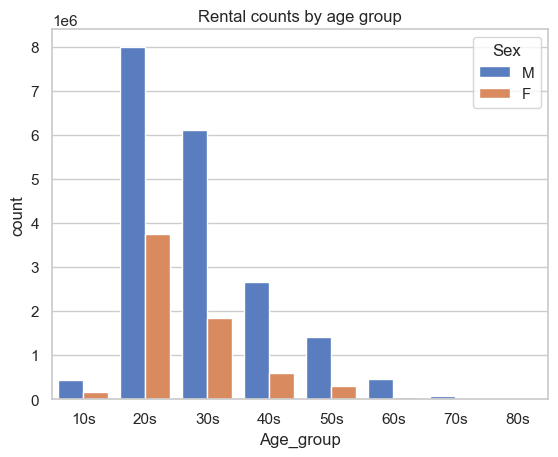

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

age_order = [f'{i}0s' for i in range(1, 9)]

sns.countplot(x='Age_group', hue='Sex', data=bike_df, palette='muted', order=age_order)
plt.title('Rental counts by age group')
plt.show()

#### 📌시각화 결과
- 전체적으로 남성 이용자의 비율이 여성 이용자의 비율보다 높았다.
- 데이터 전처리 과정에서 90세 이상 이용자들을 평균 나이인 37세로 대체하였음에도 불구하고 20대 이용자의 비율이 가장 높았다.
- 연령대별 성별에 따른 이용자 비율을 보다 자세히 살펴보기 위해 성별에 따른 20~60대 이용자들의 비율을 아래에 파이 차트로 시각화하였다.

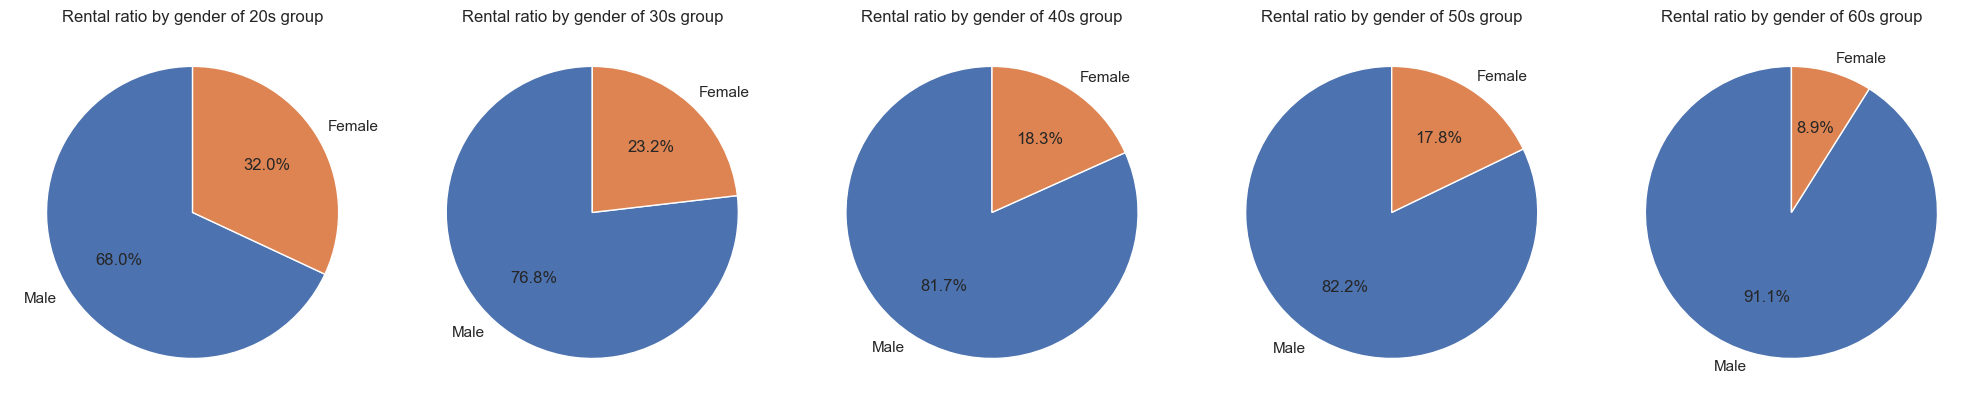

In [147]:
import numpy as np

fig, axes = plt.subplots(1, 5, figsize=(20, 15))
axes = axes.flatten()

age_groups = ['20s', '30s', '40s', '50s', '60s']
gender_ratios = []

for age_group in age_groups:
    age_df = bike_df[bike_df['Age_group'] == age_group]
    gender_counts = age_df['Sex'].value_counts()
    gender_ratio = {
        'Male': gender_counts.get('M', 0),
        'Female': gender_counts.get('F', 0)
    }
    gender_ratios.append(gender_ratio)

for i, age_group in enumerate(age_groups):
    gender_ratio = gender_ratios[i]
    labels = list(gender_ratio.keys())
    values = list(gender_ratio.values())
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Rental ratio by gender of {age_group} group')

plt.tight_layout()
plt.show()

#### 📌시각화 결과
- 막대 그래프로 시각화한 결과와 동일하게 전 연령대에서 남성 이용자 비율이 여성 이용자 비율보다 높게 나타났다.
- 특히 20대에서 60대 이용자에 이르기까지 남성 이용자의 비율은 연령대에 따라 점차 증가하는 양상을 보였다.

### ⏬영가설 1: 남성과 여성의 이용자 비율 간 차이는 높은 성비 때문일 것이다.
- 연령대에 따른 남녀 성비를 조사하기 위해 해당 데이터셋이 다루는 ZMG 구역을 감싸는 멕시코의 할리스코(Jalisco) 주 인구 피라미드 데이터를 분석하고자 하였다.

In [148]:
display(pp_df)

,Sex,Age Range,Population,Population_,Percentage,Age_group
0,Male,0 to 4 years,339122,-339122,4.087235,00s
1,Male,5 to 9 years,363911,-363911,4.386002,50s
2,Male,10 to 14 years,364020,-364020,4.387316,10s
3,Male,15 to 19 years,362796,-362796,4.372564,10s
4,Male,20 to 24 years,351982,-351982,4.242229,20s
5,Male,25 to 29 years,331070,-331070,3.990189,20s
6,Male,30 to 34 years,312917,-312917,3.771402,30s
7,Male,35 to 39 years,295336,-295336,3.559509,30s
8,Male,40 to 44 years,266310,-266310,3.209676,40s
9,Male,45 to 49 years,248266,-248266,2.992202,40s


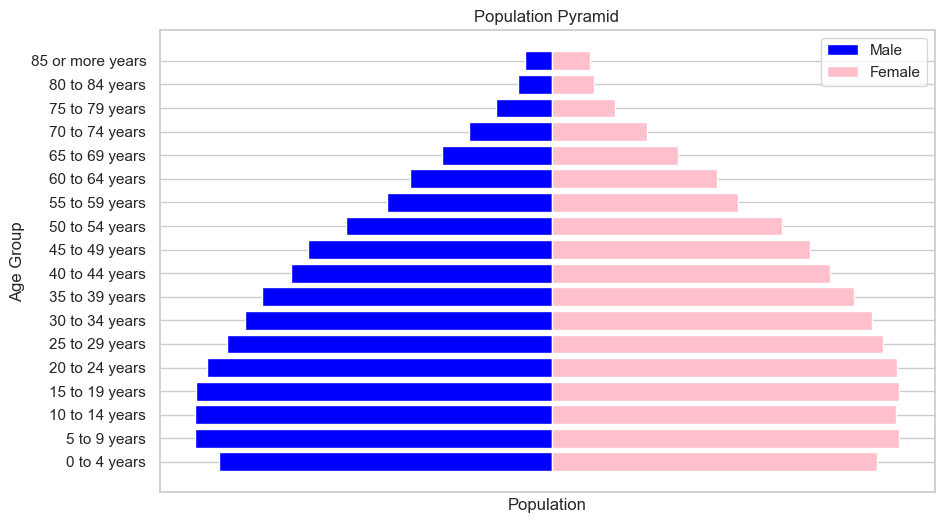

In [149]:
# 연령대 별로 인구 피라미드 형태로 시각화하기
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

male_population = pp_df.loc[pp_df['Sex'] == 'Male', 'Population_']
female_population = pp_df.loc[pp_df['Sex'] == 'Female', 'Population']

plt.barh(pp_df.loc[pp_df['Sex'] == 'Male', 'Age Range'], male_population, color='blue', label='Male')

plt.barh(pp_df.loc[pp_df['Sex'] == 'Female', 'Age Range'], female_population, color='pink', label='Female')

plt.xlabel('Population')
plt.ylabel('Age Group')
plt.title('Population Pyramid')
plt.legend()
plt.xticks([])
plt.show()

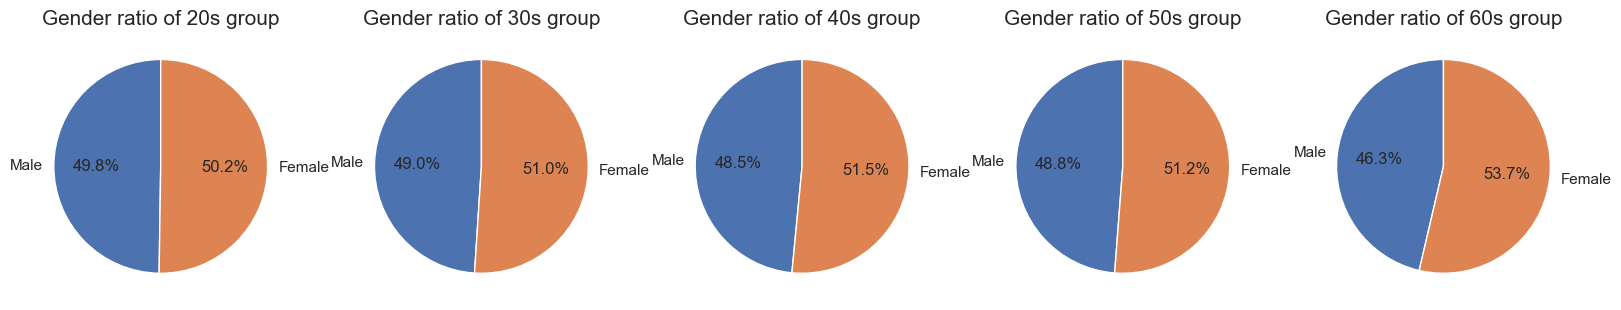

In [150]:
# 이 중 20~60대 연령대에 주목하여 파이 차트로 시각화
fig, axes = plt.subplots(1, 5, figsize=(20, 15))

axes = axes.flatten()

age_groups = ['20s', '30s', '40s', '50s', '60s']
for i, age_group in enumerate(age_groups):
    age_df = pp_df[pp_df['Age_group'] == age_group]
    age_df = age_df.groupby('Sex')['Population'].sum()
    male_population = age_df['Male']
    female_population = age_df['Female']
    axes[i].pie([male_population, female_population], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Gender ratio of {age_group} group', fontsize=15)

plt.show()

### ❌영가설 1은 참이 아니었음을 확인할 수 있다.
- 전 연령대에서 남성의 자전거 대여 서비스 이용 비율이 여성의 비율보다 높았던 것과 반대로, 실제 할리스코(Jalisco)의 인구 통계자료에 따르면 오히려 주요 연령대인 20~60대에서 여성의 비율이 더 높다.

### ➡️남성 자전거 이용 비율이 높은 현상은 단순히 성비 외에 복합적인 요인으로부터 기인했을 것이다.

#### 1. 할리스코의 연령대 및 성별에 따른 세대주(Head of Household) 데이터와 성별에 따른 노동 인구 데이터 시각화

In [151]:
display(hh_df)

,Age Range,Sex,Households,Age_group
0,12 a 14 años,Male,82,10s
1,15 a 19 años,Male,6543,10s
2,20 a 24 años,Male,49834,20s
3,25 a 29 años,Male,117119,20s
4,30 a 34 años,Male,161306,30s
5,35 a 39 años,Male,182038,30s
6,40 a 44 años,Male,177684,40s
7,45 a 49 años,Male,178972,40s
8,50 a 54 años,Male,155094,50s
9,55 a 59 años,Male,130248,50s


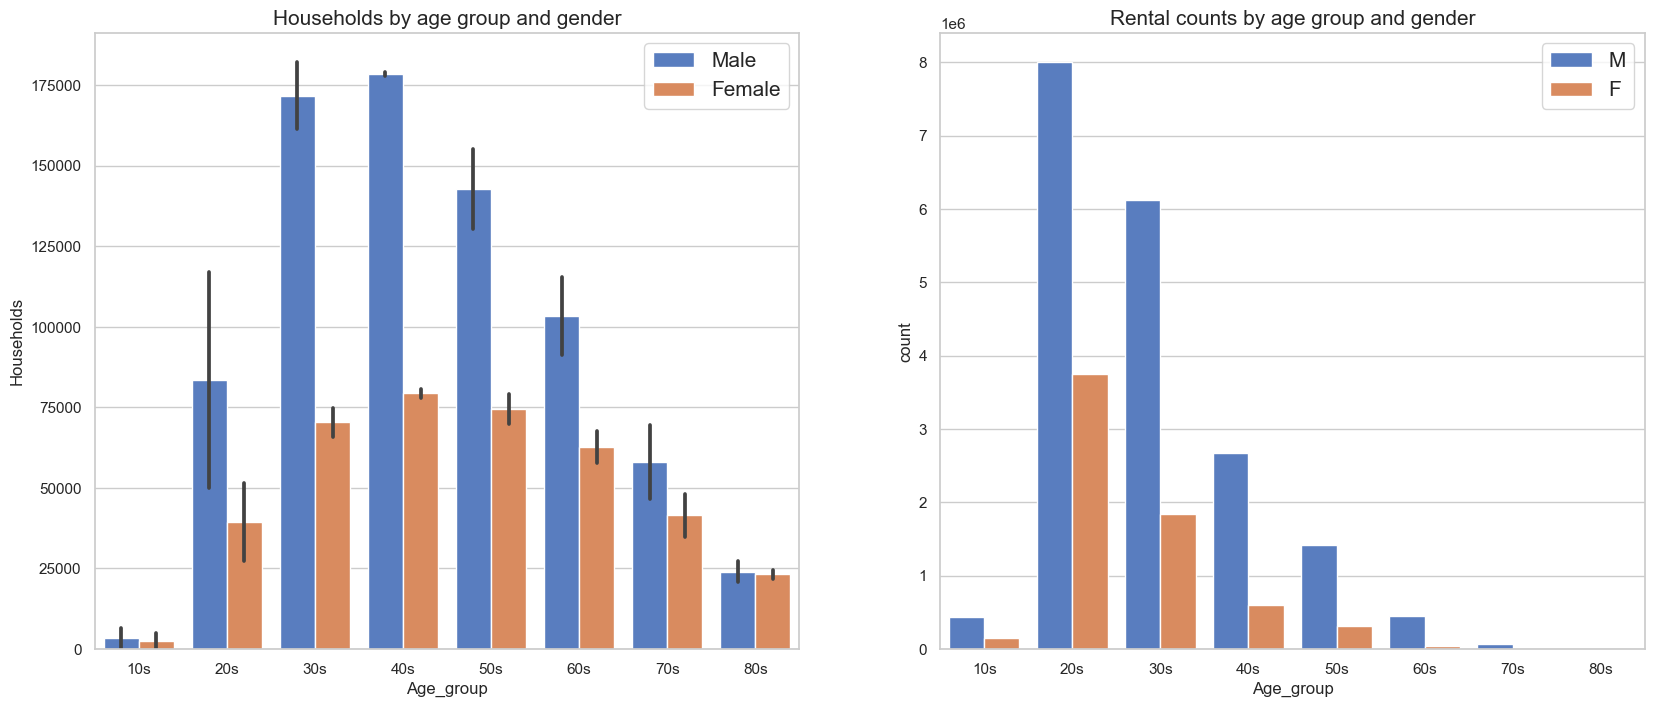

In [152]:
# 연령대별 성별에 따른 세대주 데이터와, 앞서 시각화했던 연령대별 성별에 따른 자전거 대여 이용객 수를 함께 시각화하여 살펴보겠습니다.
fig, axes = plt.subplots(1, 2, figsize=(20, 8))


sns.barplot(ax=axes[0], x='Age_group', y='Households', hue='Sex', data=hh_df, palette='muted')
axes[0].set_title('Households by age group and gender', fontsize=15)
axes[0].legend(fontsize=15)

age_order = [f'{i}0s' for i in range(1, 9)]

sns.countplot(ax=axes[1], x='Age_group', hue='Sex', data=bike_df, palette='muted', order=age_order)
axes[1].set_title('Rental counts by age group and gender', fontsize=15)
axes[1].legend(fontsize=15)

plt.show()

#### 📌시각화 결과
- 연령대별 성별에 따른 세대주 비율과 자전거 대여 서비스 이용객 비율은 대체로 유사한 분포를 보였다.
- 두 요인만으로는 상관관계를 정확히 파악하기 어려우므로, 추가적인 데이터를 분석하는 것이 필요하다고 판단하였다.
- 따라서 할리스코(Jalisco) 주의 성별에 따른 노동 인구 비율과 통근 시간 및 통근 수단 데이터를 추가로 분석하고자 한다.

#### 2. 성별에 따른 노동 인구 수 데이터 시각화

In [153]:
display(wp_df)

,Quarter,Sex,Workforce,Workforce Total,percentage,Year
0,2010-Q1,Male,2020200,2485199,0.812893,2010
1,2010-Q1,Female,1275426,2736431,0.466091,2010
2,2010-Q2,Male,2054304,2524539,0.813734,2010
3,2010-Q2,Female,1281264,2737787,0.467993,2010
4,2010-Q3,Male,2077427,2551609,0.814164,2010
...,...,...,...,...,...,...
105,2023-Q2,Female,1781220,3545487,0.502391,2023
106,2023-Q3,Male,2413181,3139169,0.768732,2023
107,2023-Q3,Female,1705373,3516809,0.484921,2023
108,2023-Q4,Male,2420321,3191553,0.758352,2023


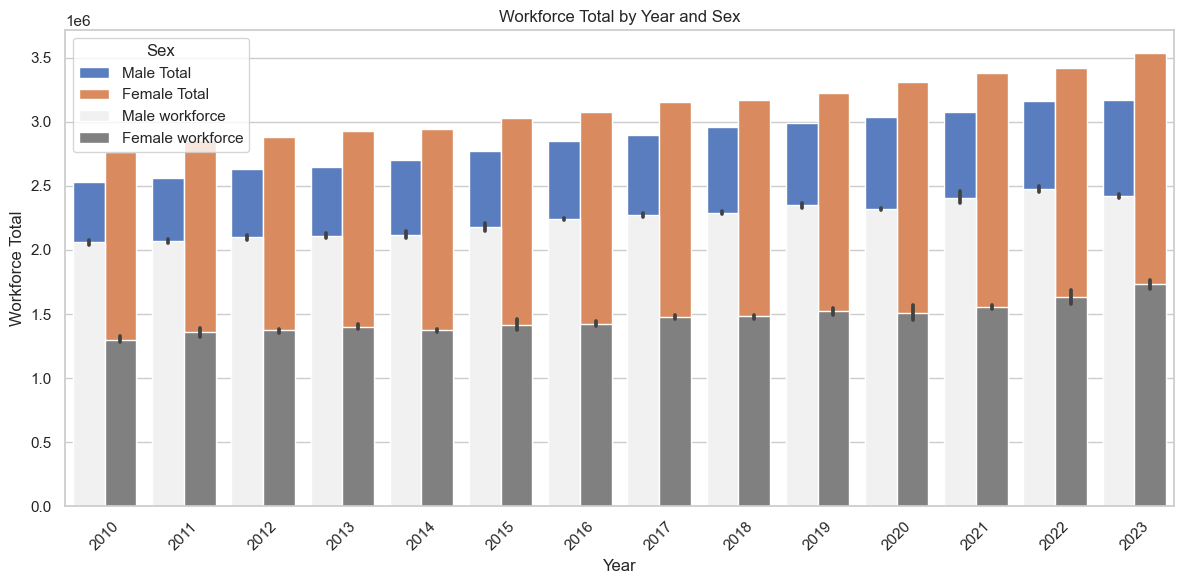

In [154]:
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(ax=ax, data=wp_df, x='Year', y='Workforce Total', hue='Sex', errorbar=None, palette='muted')

sns.barplot(ax=ax, x='Year', y='Workforce', data=wp_df, hue='Sex', color='gray', width=0.8)

plt.xlabel('Year')
plt.ylabel('Workforce Total')
plt.title('Workforce Total by Year and Sex')

handles, labels = ax.get_legend_handles_labels()
plt.legend(title='Sex', handles=handles[:2] + handles[2:],
           labels=['Male Total', 'Female Total', 'Male workforce', 'Female workforce'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 📌시각화 결과
- 할리스코(Jalisco) 주의 성별에 따른 노동 인구 비율을 시각화한 결과, 2010년부터 2023년까지 전 연도에서 노동 가능 총 인구수는 여성이 남성보다 많았음에도 불구하고 실제 노동자 수는 남성의 비율이 더 높게 나타났다.
- 현재까지의 분석 결과를 종합해보면, 할리스코의 남녀 성비는 여성이 남성보다 높은 비율을 차지하지만, 전 연령대에서 세대주 및 노동 인구 비율은 남성이 여성보다 높게 나타났다.
- 따라서 아래와 같은 영가설을 세워볼 수 있다.

### ⏬영가설 2: 남성 자전거 이용 비율이 높은 현상은 할리스코 내 남성의 노동 비율이 더 높은 사실로부터 기인한다.

- 해당 가설을 검증하기 위해 할리스코 내의 통근 수단 데이터와 성별에 따른 통근 시간 데이터를 분석하였다.

#### 3. 통근 수단 중 자전거의 비율 및 성별에 따른 통근 시간에 대한 시각화

In [155]:
display(tp_df)

,Time to Work,Work Mean,Population,Share
0,Up to 15 minutes,"Bus, taxi, or similar",80968,0.092984
1,Up to 15 minutes,"Train, subway or similar",1699,0.001951
2,Up to 15 minutes,"Own vehicle (car, truck or motorcycle)",294477,0.338177
3,Up to 15 minutes,Labor transportation,28379,0.032590
4,Up to 15 minutes,Bike,71384,0.081977
5,Up to 15 minutes,Walking,387124,0.444573
6,Up to 15 minutes,Other,6747,0.007748
7,From 16 to 30 minutes,"Bus, taxi, or similar",268229,0.332911
8,From 16 to 30 minutes,"Train, subway or similar",6298,0.007817
9,From 16 to 30 minutes,"Own vehicle (car, truck or motorcycle)",310539,0.385423


In [156]:
display(tw_df)

,Sex,Time to Work,Population,Share
0,Female,Up to 15 minutes,449327,0.319088
1,Female,From 16 to 30 minutes,330910,0.234995
2,Female,From 31 minutes to 1 hour,299096,0.212402
3,Female,Between 1 to 2 hours,113876,0.080869
4,Female,More than 2 hours,12772,0.009070
5,Female,Doesn't move to work,202177,0.143576
6,Male,Up to 15 minutes,659453,0.313038
7,Male,From 16 to 30 minutes,548417,0.260330
8,Male,From 31 minutes to 1 hour,491259,0.233197
9,Male,Between 1 to 2 hours,200833,0.095334


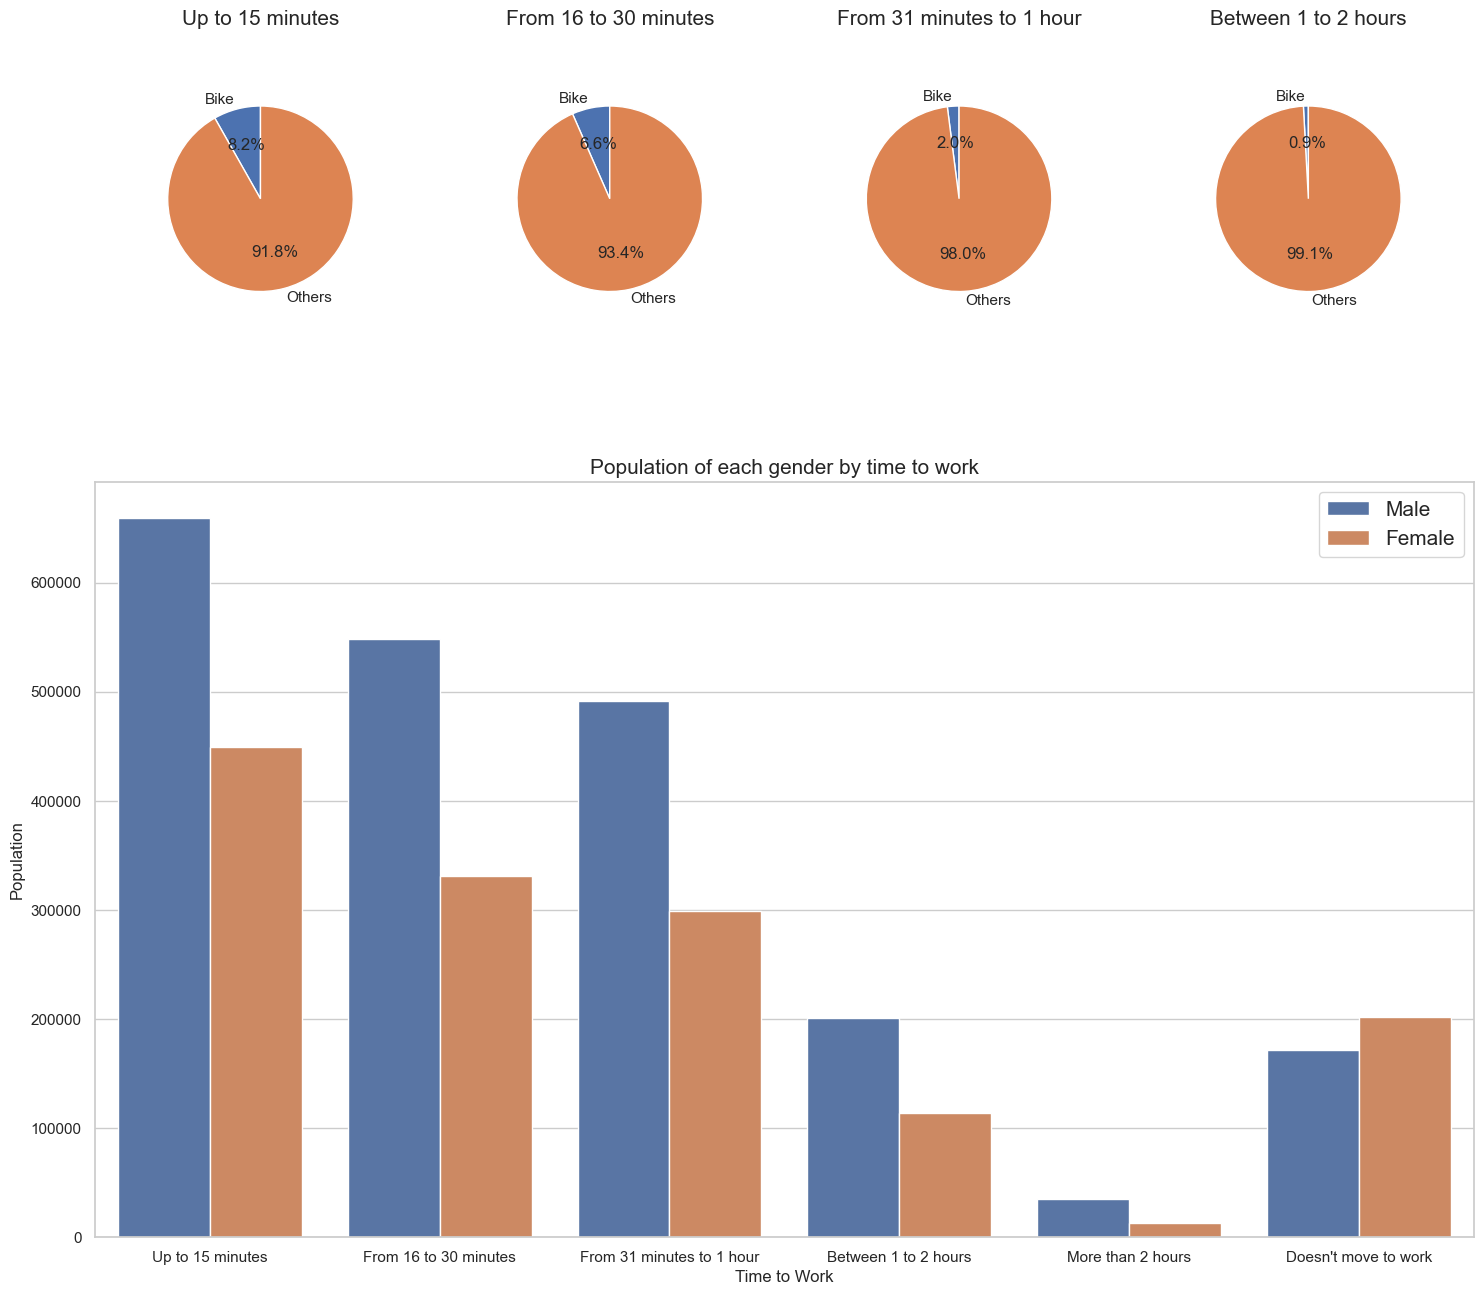

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 15))

ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax3 = plt.subplot2grid((2, 4), (0, 2))
ax4 = plt.subplot2grid((2, 4), (0, 3))
ax5 = plt.subplot2grid((2, 4), (1, 0), colspan=4)

axes = [ax1, ax2, ax3, ax4]

time_order = ['Up to 15 minutes', 'From 16 to 30 minutes', 'From 31 minutes to 1 hour', 'Between 1 to 2 hours', 'More than 2 hours',
             'Doesn\'t move to work']
for i, time in enumerate(time_order[:4]):
    df = tp_df[tp_df['Time to Work'] == time]
    data = [df.loc[df['Work Mean'] == 'Bike', 'Population'].sum(), df.loc[df['Work Mean'] != 'Bike', 'Population'].sum()]
    axes[i].pie(data, labels=['Bike', 'Others'], startangle=90, autopct='%1.1f%%', radius=0.7)
    axes[i].set_title(time, fontsize=15)

sns.barplot(ax=ax5, x='Time to Work', y='Population', hue='Sex', data=tw_df, order=time_order, hue_order=['Male', 'Female'])
ax5.set_title('Population of each gender by time to work', fontsize=15)
ax5.legend(fontsize=15)
plt.tight_layout()
plt.show()

#### 📌시각화 결과
- 할리스코(Jalisco) 주의 통근 시간에 따라 이용하는 통근 수단 데이터를 시각화한 결과, 특히 15분 이하 및 30분 이하 통근 시간 그룹에서 자전거 이용 비율이 높게 나타났다.
- 또한 할리스코 주의 통근 시간별 노동 인구 수 데이터를 시각화한 결과, 15분 이하 및 30분 이하 통근 시간 그룹의 인구 수가 가장 많았다.
- 따라서 가장 많은 노동 인구가 속하는 30분 이하 통근 시간 그룹에서, 특히 남성의 노동 비율이 여성보다 높은 해당 그룹에서 자전거 이용 비율이 높게 나타났다는 사실은 영가설 2를 뒷받침하는 근거가 될 수 있다.

- 추가적인 분석을 위해 자전거 대여 서비스 이용 데이터를 보다 자세히 분석해보고자 한다.

#### 4. 자전거 대여 서비스 이용 데이터 시각화

- 성별에 따라 총 대여 시간을 구하여 분포를 violinplot으로 시각화하고자 한다.

In [158]:
bike_df

,Trip_Id,User_Id,Sex,Birth_year,Trip_start,Trip_end,Origin_Id,Destination_Id,Age,Duration,Age_group
0,32244893,1470734,M,1981,2024-01-31 23:59:33,2024-02-01 00:11:15,24,86,43,0 days 00:11:42,40s
1,32244892,2731702,M,1994,2024-01-31 23:59:06,2024-02-01 00:10:49,48,279,30,0 days 00:11:43,30s
2,32244891,1431452,M,2001,2024-01-31 23:58:48,2024-02-01 00:01:42,273,383,23,0 days 00:02:54,20s
3,32244890,2312602,F,2003,2024-01-31 23:58:44,2024-02-01 00:01:58,273,383,21,0 days 00:03:14,20s
4,32244889,2266427,M,1999,2024-01-31 23:58:44,2024-02-01 00:01:39,273,383,25,0 days 00:02:55,20s
...,...,...,...,...,...,...,...,...,...,...,...
25863685,4739,102,M,1982,2014-12-01 12:18:35,2014-12-01 12:19:55,83,83,32,0 days 00:01:20,30s
25863686,4738,5073,M,1982,2014-12-01 12:17:22,2014-12-01 12:25:46,45,49,32,0 days 00:08:24,30s
25863687,4732,5547,M,1964,2014-12-01 12:15:08,2014-12-01 12:23:42,8,34,50,0 days 00:08:34,50s
25863688,4726,6044,M,1968,2014-12-01 12:11:29,2014-12-01 12:25:03,35,21,46,0 days 00:13:34,40s


In [159]:
bike_df['total_minutes'] = tqdm((pd.to_datetime(bike_df['Trip_end']) - pd.to_datetime(bike_df['Trip_start'])).dt.total_seconds() / 60)
bike_df

100%|█████████████████████████████████████████████████████████████████| 25863690/25863690 [00:04<00:00, 5555749.63it/s]


,Trip_Id,User_Id,Sex,Birth_year,Trip_start,Trip_end,Origin_Id,Destination_Id,Age,Duration,Age_group,total_minutes
0,32244893,1470734,M,1981,2024-01-31 23:59:33,2024-02-01 00:11:15,24,86,43,0 days 00:11:42,40s,11.700000
1,32244892,2731702,M,1994,2024-01-31 23:59:06,2024-02-01 00:10:49,48,279,30,0 days 00:11:43,30s,11.716667
2,32244891,1431452,M,2001,2024-01-31 23:58:48,2024-02-01 00:01:42,273,383,23,0 days 00:02:54,20s,2.900000
3,32244890,2312602,F,2003,2024-01-31 23:58:44,2024-02-01 00:01:58,273,383,21,0 days 00:03:14,20s,3.233333
4,32244889,2266427,M,1999,2024-01-31 23:58:44,2024-02-01 00:01:39,273,383,25,0 days 00:02:55,20s,2.916667
...,...,...,...,...,...,...,...,...,...,...,...,...
25863685,4739,102,M,1982,2014-12-01 12:18:35,2014-12-01 12:19:55,83,83,32,0 days 00:01:20,30s,1.333333
25863686,4738,5073,M,1982,2014-12-01 12:17:22,2014-12-01 12:25:46,45,49,32,0 days 00:08:24,30s,8.400000
25863687,4732,5547,M,1964,2014-12-01 12:15:08,2014-12-01 12:23:42,8,34,50,0 days 00:08:34,50s,8.566667
25863688,4726,6044,M,1968,2014-12-01 12:11:29,2014-12-01 12:25:03,35,21,46,0 days 00:13:34,40s,13.566667


In [160]:
# 위에서 total_minutes에 저장한 총 대여 시간의 4분위 분포도를 확인해봅니다.
bike_df.groupby('Sex')['total_minutes'].describe().T

Sex,F,M
count,6.708589e+06,1.915510e+07
mean,1.747666e+01,1.646352e+01
std,9.482546e+02,9.265369e+02
min,1.000000e+00,1.000000e+00
25%,6.316667e+00,5.966667e+00
50%,9.883333e+00,9.583333e+00
75%,1.495000e+01,1.476667e+01
max,3.517822e+05,6.292288e+05


In [165]:
# 남성과 여성 모두 상위 25%까지 15분 이내의 값을 가지고 있음을 확인할 수 있습니다.
# 30분보다 큰 대여 시간 데이터 수를 확인하고 시각화합니다.
female_long_cnt = bike_df[(bike_df['Sex'] == 'F') & (bike_df['total_minutes'] > 30)].count()['Trip_Id']
female_short_cnt = bike_df[bike_df['Sex'] == 'F'].count()['Trip_Id'] - female_long_cnt
male_long_cnt = bike_df[(bike_df['Sex'] == 'M') & (bike_df['total_minutes'] > 30)].count()['Trip_Id']
male_short_cnt = bike_df[bike_df['Sex'] == 'M'].count()['Trip_Id'] - male_long_cnt

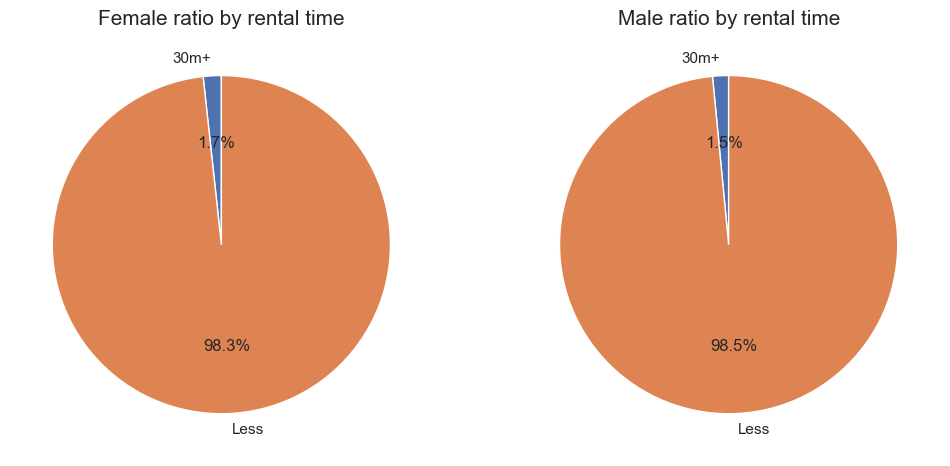

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie([female_long_cnt, female_short_cnt], labels=['30m+', 'Less'], startangle=90, autopct='%1.1f%%')
axes[0].set_title('Female ratio by rental time', fontsize=15)
axes[1].pie([male_long_cnt, male_short_cnt], labels=['30m+', 'Less'], startangle=90, autopct='%1.1f%%')
axes[1].set_title('Male ratio by rental time', fontsize=15)

plt.show()

In [167]:
# 30분을 초과하는 대여 시간 데이터의 비율이 매우 낮으므로 대부분 30분 이하로 대여했음을 알 수 있습니다.
# 이 때, 상위 25% 값과 최댓값의 차이가 너무 크므로 iqr값을 구하여 정상범위를 구한 뒤 낮은 비율을 차지하는 30분 초과의 값을 대체합니다.
bike_df_dist = bike_df.groupby('Sex')['total_minutes'].describe()
bike_df_dist

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,6708589.0,17.476664,948.254588,1.0,6.316667,9.883333,14.950000,351782.150000
M,19155101.0,16.463522,926.536856,1.0,5.966667,9.583333,14.766667,629228.766667


In [168]:
f_Q1 = bike_df_dist.loc['F', '25%']
f_Q3 = bike_df_dist.loc['F', '75%']

f_iqr = f_Q3 - f_Q1
f_lower_bound = f_Q1 - 1.5 * f_iqr
f_upper_bound = f_Q3 + 1.5 * f_iqr

In [169]:
# lower_bound보다 작은 값 및 upper_bound보다 큰 값에 대해 대체할 값을 정하기 위해, 평균값 및 중앙값과의 차이를 구하여 평균을 구해봅니다.
avg_dist_mean = bike_df.loc[bike_df['Sex'] == 'F', 'total_minutes'].apply(lambda x: abs(x - bike_df_dist.loc['F', 'mean'])).mean()

mid_dist_mean = bike_df.loc[bike_df['Sex'] == 'F', 'total_minutes'].apply(lambda x: abs(x - bike_df_dist.loc['F', '50%'])).mean()

print(avg_dist_mean)
print()
print(mid_dist_mean)
print()

14.107641050865297

11.250672145811874



In [170]:
# 중앙값과의 평균적인 편차가 더 적기 때문에 범위를 벗어난 값에 대해서는 중앙값으로 대체합니다.
median_value = bike_df_dist.loc['F', '50%']
bike_df.loc[(bike_df['Sex'] == 'F') & ((bike_df['total_minutes'] < f_lower_bound) | (bike_df['total_minutes'] > f_upper_bound)), 'total_minutes'] = median_value

bike_df.groupby('Sex')['total_minutes'].describe().T

Sex,F,M
count,6.708589e+06,1.915510e+07
mean,1.077649e+01,1.646352e+01
std,5.746452e+00,9.265369e+02
min,1.000000e+00,1.000000e+00
25%,6.316667e+00,5.966667e+00
50%,9.883333e+00,9.583333e+00
75%,1.428333e+01,1.476667e+01
max,2.790000e+01,6.292288e+05


In [171]:
# 마찬가지로 남성 데이터에 대해서도 같은 과정을 수행합니다.

m_Q1 = bike_df_dist.loc['M', '25%']
m_Q3 = bike_df_dist.loc['M', '75%']

m_iqr = m_Q3 - m_Q1
m_lower_bound = m_Q1 - 1.5 * m_iqr
m_upper_bound = m_Q3 + 1.5 * m_iqr

# lower_bound보다 작은 값 및 upper_bound보다 큰 값에 대해 대체할 값을 정하기 위해, 평균값 및 중앙값과의 차이를 구하여 평균을 구해봅니다.
avg_dist_mean = bike_df.loc[bike_df['Sex'] == 'M', 'total_minutes'].apply(lambda x: abs(x - bike_df_dist.loc['M', 'mean'])).mean()

mid_dist_mean = bike_df.loc[bike_df['Sex'] == 'M', 'total_minutes'].apply(lambda x: abs(x - bike_df_dist.loc['M', '50%'])).mean()

print(avg_dist_mean)
print()
print(mid_dist_mean)
print()

12.914315995917493

10.559965357704641



In [172]:
# 중앙값과의 평균적인 편차가 더 적기 때문에 범위를 벗어난 값에 대해서는 중앙값으로 대체합니다.
median_value = bike_df_dist.loc['M', '50%']
bike_df.loc[(bike_df['Sex'] == 'M') & ((bike_df['total_minutes'] < m_lower_bound) | (bike_df['total_minutes'] > m_upper_bound)), 'total_minutes'] = median_value

bike_df.groupby('Sex')['total_minutes'].describe().T

Sex,F,M
count,6.708589e+06,1.915510e+07
mean,1.077649e+01,1.055867e+01
std,5.746452e+00,5.863723e+00
min,1.000000e+00,1.000000e+00
25%,6.316667e+00,5.966667e+00
50%,9.883333e+00,9.583333e+00
75%,1.428333e+01,1.416667e+01
max,2.790000e+01,2.796667e+01


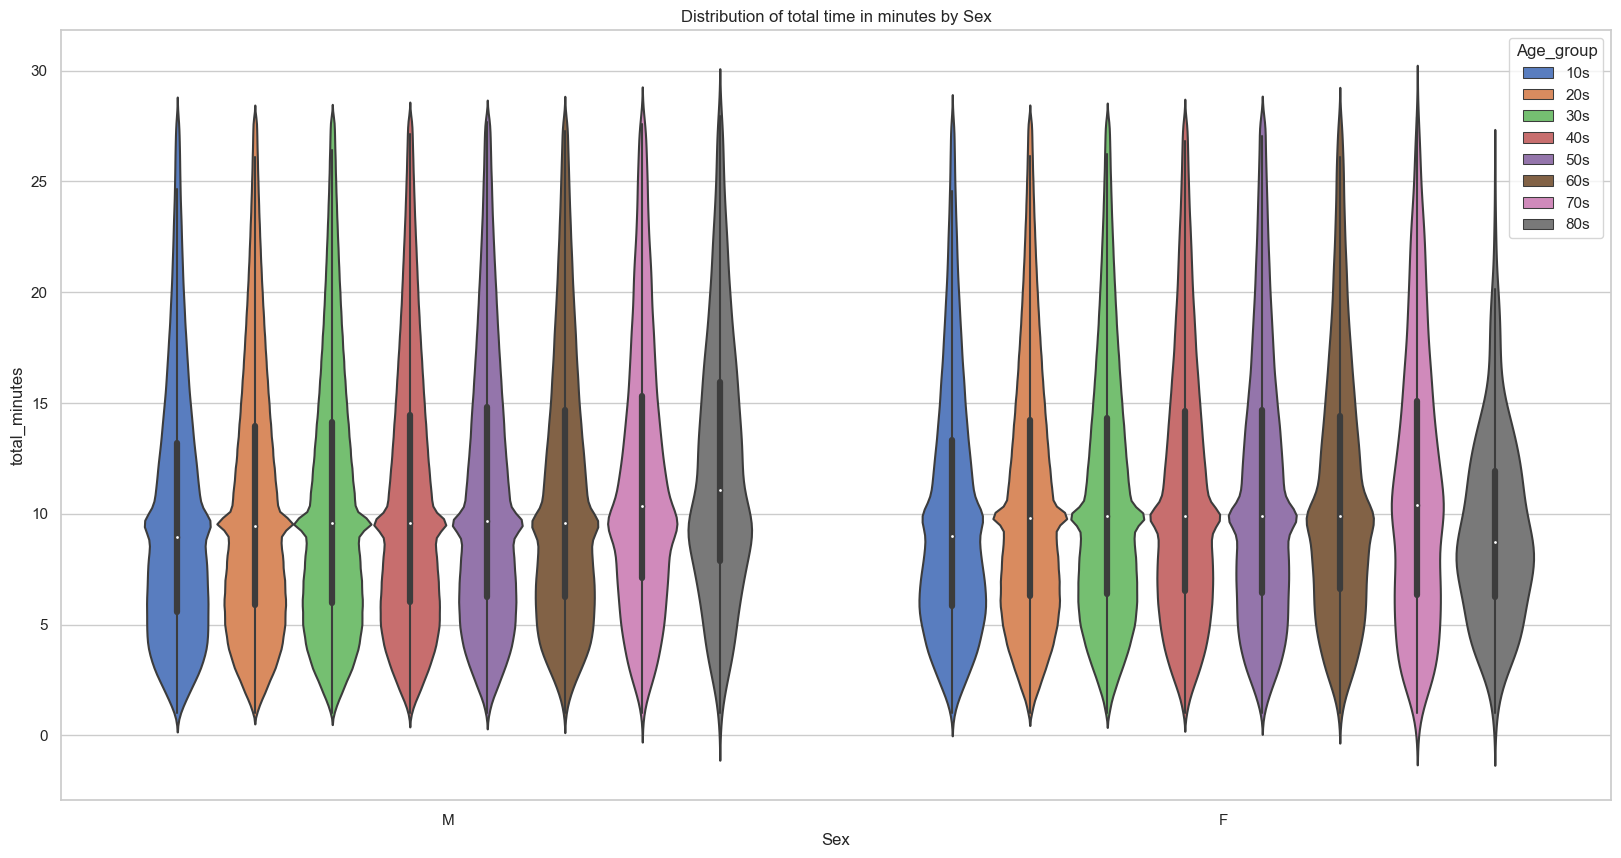

In [173]:
# 성별에 따른 대여 시간 분포를 바이올린플롯으로 시각화합니다.
plt.figure(figsize=(20, 10))
hue_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']
sns.violinplot(x='Sex', y='total_minutes', hue='Age_group', hue_order=hue_order, data=bike_df, palette='muted', scale_hue=True, dodge=True)
plt.title('Distribution of total time in minutes by Sex')
plt.show()

#### 📌시각화 결과
- 자전거 대여 서비스 이용 데이터를 성별에 따라 나누어 시각화하였다.
- 대여 시간을 기준으로 분포를 살펴보았을 때, 30분을 초과하는 대여 시간을 가진 데이터는 여성이 약 1.7%, 남성이 약 1.5%로 대부분의 대여가 30분 이하로 이루어졌음을 확인할 수 있다.
- 이때 대여 시간의 최댓값과 상위 25%값이 남성의 경우 약 630,000분과 1.48분으로 매우 큰 차이를 보여, 상위 25%값과 하위 25%값을 기준으로 iqr 값을 계산한 후 정상 범위를 구하여 벗어난 값을 대체하였다.
- 평균과 중앙값 중 각 값과의 차이의 평균이 더 작은 중앙값으로 대체하였다.

- 앞선 데이터 분석 과정에서 30분 이하 통근 시간을 가진 그룹, 그 중에서도 특히 노동 인구 비율이 높은 남성 그룹에서 자전거 이용 비율이 높게 나타났던 것과 더불어, 자전거 대여 데이터를 시각화한 결과로부터 남성과 여성 모두 약 98% 이상의 대여가 30분 이하로 이루어졌다는 점에서 영가설 2에 대한 근거를 찾을 수 있다.

#### 5. 자전거 대여소의 위치를 기준으로 한 대여 데이터 시각화

- 대여소 위치와 관련된 데이터(2번 데이터: ZMG 지역에서의 MiBici 자전거 대여소 데이터)를 바탕으로,  
  출근 시간대(07\~10시) 및 퇴근 시간대(16\~19시) 대여 데이터의 대여 위치와 반납 위치의 분포를 분석함으로써  
  실제로 통근을 위한 대여가 가장 큰 비중을 차지했는지 확인해보고자 한다.

In [179]:
display(station_df)

,id,name,latitude,longitude,status
0,2,C. Epigmenio Glez./ Av. 16 de Sept.,20.666378,-103.348820,IN_SERVICE
1,3,C. Colonias / Av. Niños héroes,20.667228,-103.366000,IN_SERVICE
2,4,C. Vidrio / Av. Chapultepec,20.667690,-103.368252,IN_SERVICE
3,5,C. Ghilardi /C. Miraflores,20.691750,-103.362550,IN_SERVICE
4,6,C. San Diego /Calzada Independencia,20.681158,-103.339363,IN_SERVICE
...,...,...,...,...,...
367,384,C. Calpulalpan / C. Independencia,20.678006,-103.341808,IN_SERVICE
368,385,Juan José Baz/Silvestre Revueltas,20.691523,-103.340601,IN_SERVICE
369,386,Porfirio Díaz/Francisco Javier Mina,20.670670,-103.324521,IN_SERVICE
370,387,Gral. Arteaga/Fray Antonio Alcalde,20.686850,-103.347791,IN_SERVICE


In [180]:
display(bike_df)

,Trip_Id,User_Id,Sex,Birth_year,Trip_start,Trip_end,Origin_Id,Destination_Id,Age,Duration,Age_group,total_minutes
0,32244893,1470734,M,1981,2024-01-31 23:59:33,2024-02-01 00:11:15,24,86,43,0 days 00:11:42,40s,11.700000
1,32244892,2731702,M,1994,2024-01-31 23:59:06,2024-02-01 00:10:49,48,279,30,0 days 00:11:43,30s,11.716667
2,32244891,1431452,M,2001,2024-01-31 23:58:48,2024-02-01 00:01:42,273,383,23,0 days 00:02:54,20s,2.900000
3,32244890,2312602,F,2003,2024-01-31 23:58:44,2024-02-01 00:01:58,273,383,21,0 days 00:03:14,20s,3.233333
4,32244889,2266427,M,1999,2024-01-31 23:58:44,2024-02-01 00:01:39,273,383,25,0 days 00:02:55,20s,2.916667
...,...,...,...,...,...,...,...,...,...,...,...,...
25863685,4739,102,M,1982,2014-12-01 12:18:35,2014-12-01 12:19:55,83,83,32,0 days 00:01:20,30s,1.333333
25863686,4738,5073,M,1982,2014-12-01 12:17:22,2014-12-01 12:25:46,45,49,32,0 days 00:08:24,30s,8.400000
25863687,4732,5547,M,1964,2014-12-01 12:15:08,2014-12-01 12:23:42,8,34,50,0 days 00:08:34,50s,8.566667
25863688,4726,6044,M,1968,2014-12-01 12:11:29,2014-12-01 12:25:03,35,21,46,0 days 00:13:34,40s,13.566667


#### **출근 시간대(07~10시) 데이터**
- 07~10시 사이에 대여와 반납이 이루어진 데이터의 대여소 위치를 지도에 시각화합니다.

In [226]:
bike_df['Trip_start'] = pd.to_datetime(bike_df['Trip_start'])
print(bike_df['Trip_start'].dtype)
bike_df['Trip_end'] = pd.to_datetime(bike_df['Trip_end'])
print(bike_df['Trip_end'].dtype)

datetime64[ns]
datetime64[ns]


In [227]:
# 출근 시간대에 대여한 데이터를 추출하여 저장
to_office_bike_df = bike_df[(bike_df['Trip_start'].dt.hour >= 7) & \
                    (bike_df['Trip_start'].dt.hour <= 10) & (bike_df['Trip_end'].dt.hour >= 7) & \
                    (bike_df['Trip_end'].dt.hour <= 10)]

# 출발 대여소로 이용된 횟수를 origin_count에 저장
to_office_origin_cnts = to_office_bike_df['Origin_Id'].value_counts()
for id in station_df['id']:
    station_df.loc[station_df['id'] == id, 'to_office_origin_count'] = to_office_origin_cnts.get(id, 0)
station_df

,id,name,latitude,longitude,status,to_office_origin_count
0,2,C. Epigmenio Glez./ Av. 16 de Sept.,20.666378,-103.348820,IN_SERVICE,41066.0
1,3,C. Colonias / Av. Niños héroes,20.667228,-103.366000,IN_SERVICE,25910.0
2,4,C. Vidrio / Av. Chapultepec,20.667690,-103.368252,IN_SERVICE,25290.0
3,5,C. Ghilardi /C. Miraflores,20.691750,-103.362550,IN_SERVICE,29686.0
4,6,C. San Diego /Calzada Independencia,20.681158,-103.339363,IN_SERVICE,23834.0
...,...,...,...,...,...,...
367,384,C. Calpulalpan / C. Independencia,20.678006,-103.341808,IN_SERVICE,41.0
368,385,Juan José Baz/Silvestre Revueltas,20.691523,-103.340601,IN_SERVICE,341.0
369,386,Porfirio Díaz/Francisco Javier Mina,20.670670,-103.324521,IN_SERVICE,199.0
370,387,Gral. Arteaga/Fray Antonio Alcalde,20.686850,-103.347791,IN_SERVICE,533.0


In [228]:
# 반납 대여소로 이용된 횟수를 destination_count에 저장
to_office_destination_cnts = to_office_bike_df['Destination_Id'].value_counts()
for id in station_df['id']:
    station_df.loc[station_df['id'] == id, 'to_office_destination_count'] = to_office_destination_cnts.get(id, 0)
station_df

,id,name,latitude,longitude,status,to_office_origin_count,to_office_destination_count
0,2,C. Epigmenio Glez./ Av. 16 de Sept.,20.666378,-103.348820,IN_SERVICE,41066.0,36644.0
1,3,C. Colonias / Av. Niños héroes,20.667228,-103.366000,IN_SERVICE,25910.0,26098.0
2,4,C. Vidrio / Av. Chapultepec,20.667690,-103.368252,IN_SERVICE,25290.0,35976.0
3,5,C. Ghilardi /C. Miraflores,20.691750,-103.362550,IN_SERVICE,29686.0,20151.0
4,6,C. San Diego /Calzada Independencia,20.681158,-103.339363,IN_SERVICE,23834.0,17285.0
...,...,...,...,...,...,...,...
367,384,C. Calpulalpan / C. Independencia,20.678006,-103.341808,IN_SERVICE,41.0,195.0
368,385,Juan José Baz/Silvestre Revueltas,20.691523,-103.340601,IN_SERVICE,341.0,132.0
369,386,Porfirio Díaz/Francisco Javier Mina,20.670670,-103.324521,IN_SERVICE,199.0,136.0
370,387,Gral. Arteaga/Fray Antonio Alcalde,20.686850,-103.347791,IN_SERVICE,533.0,196.0


#### **퇴근 시간대(16~19시) 데이터**
- 16~19시 사이에 대여와 반납이 이루어진 데이터의 대여소 위치를 지도에 시각화합니다.

In [243]:
# 출근 시간대에 대여한 데이터를 추출하여 저장
from_office_bike_df = bike_df[(bike_df['Trip_start'].dt.hour >= 16) & \
                    (bike_df['Trip_start'].dt.hour <= 19) & (bike_df['Trip_end'].dt.hour >= 16) & \
                    (bike_df['Trip_end'].dt.hour <= 19)]

# 출발 대여소로 이용된 횟수를 origin_count에 저장
from_office_origin_cnts = from_office_bike_df['Origin_Id'].value_counts()
for id in station_df['id']:
    station_df.loc[station_df['id'] == id, 'from_office_origin_count'] = from_office_origin_cnts.get(id, 0)
station_df

,id,name,latitude,longitude,status,to_office_origin_count,to_office_destination_count,from_office_origin_count
0,2,C. Epigmenio Glez./ Av. 16 de Sept.,20.666378,-103.348820,IN_SERVICE,41066.0,36644.0,35501.0
1,3,C. Colonias / Av. Niños héroes,20.667228,-103.366000,IN_SERVICE,25910.0,26098.0,34867.0
2,4,C. Vidrio / Av. Chapultepec,20.667690,-103.368252,IN_SERVICE,25290.0,35976.0,48105.0
3,5,C. Ghilardi /C. Miraflores,20.691750,-103.362550,IN_SERVICE,29686.0,20151.0,24033.0
4,6,C. San Diego /Calzada Independencia,20.681158,-103.339363,IN_SERVICE,23834.0,17285.0,18343.0
...,...,...,...,...,...,...,...,...
367,384,C. Calpulalpan / C. Independencia,20.678006,-103.341808,IN_SERVICE,41.0,195.0,156.0
368,385,Juan José Baz/Silvestre Revueltas,20.691523,-103.340601,IN_SERVICE,341.0,132.0,164.0
369,386,Porfirio Díaz/Francisco Javier Mina,20.670670,-103.324521,IN_SERVICE,199.0,136.0,180.0
370,387,Gral. Arteaga/Fray Antonio Alcalde,20.686850,-103.347791,IN_SERVICE,533.0,196.0,481.0


In [244]:
# 반납 대여소로 이용된 횟수를 destination_count에 저장
from_office_destination_cnts = from_office_bike_df['Destination_Id'].value_counts()
for id in station_df['id']:
    station_df.loc[station_df['id'] == id, 'from_office_destination_count'] = from_office_destination_cnts.get(id, 0)
station_df

,id,name,latitude,longitude,status,to_office_origin_count,to_office_destination_count,from_office_origin_count,from_office_destination_count
0,2,C. Epigmenio Glez./ Av. 16 de Sept.,20.666378,-103.348820,IN_SERVICE,41066.0,36644.0,35501.0,45819.0
1,3,C. Colonias / Av. Niños héroes,20.667228,-103.366000,IN_SERVICE,25910.0,26098.0,34867.0,25318.0
2,4,C. Vidrio / Av. Chapultepec,20.667690,-103.368252,IN_SERVICE,25290.0,35976.0,48105.0,37816.0
3,5,C. Ghilardi /C. Miraflores,20.691750,-103.362550,IN_SERVICE,29686.0,20151.0,24033.0,27214.0
4,6,C. San Diego /Calzada Independencia,20.681158,-103.339363,IN_SERVICE,23834.0,17285.0,18343.0,32291.0
...,...,...,...,...,...,...,...,...,...
367,384,C. Calpulalpan / C. Independencia,20.678006,-103.341808,IN_SERVICE,41.0,195.0,156.0,111.0
368,385,Juan José Baz/Silvestre Revueltas,20.691523,-103.340601,IN_SERVICE,341.0,132.0,164.0,340.0
369,386,Porfirio Díaz/Francisco Javier Mina,20.670670,-103.324521,IN_SERVICE,199.0,136.0,180.0,175.0
370,387,Gral. Arteaga/Fray Antonio Alcalde,20.686850,-103.347791,IN_SERVICE,533.0,196.0,481.0,677.0


In [249]:
import folium
from folium.plugins import HeatMap
from IPython.display import display, HTML

# 대여소 위치에 따른 대여 횟수를 지도에 HeatMap으로 시각화
m1_center = [20.673954,-103.356417]
m1 = folium.Map(location=m1_center, zoom_start=13.3)

locations = [[station['latitude'], station['longitude']] for _, station in station_df.iterrows()]
origin_counts = [station['to_office_origin_count'] for _, station in station_df.iterrows()]

origin_data = [tuple(locations[i] + [origin_counts[i]]) for i in range(len(origin_counts))]
HeatMap(origin_data, radius=15, name='Origin Counts HeatMap (07-10)').add_to(m1)

folium.Circle(location=m1_center, radius=200, color='red').add_to(m1)

m2_center = [20.677206,-103.344983]
m2 = folium.Map(location=m2_center, zoom_start=13.3)

destination_counts = [station['to_office_destination_count'] for _, station in station_df.iterrows()]

destination_data = [tuple(locations[i] + [destination_counts[i]]) for i in range(len(destination_counts))]
HeatMap(destination_data, radius=15, name='Destination Counts HeatMap (07-10)').add_to(m2)

folium.Circle(location=m2_center, radius=200, color='red').add_to(m2)

m3_center = [20.673954,-103.356417]
m3 = folium.Map(location=m3_center, zoom_start=13.3)

origin_counts = [station['from_office_origin_count'] for _, station in station_df.iterrows()]

origin_data = [tuple(locations[i] + [origin_counts[i]]) for i in range(len(origin_counts))]
HeatMap(origin_data, radius=15, name='Origin Counts HeatMap (16-19)').add_to(m3)

folium.Circle(location=m3_center, radius=200, color='red').add_to(m3)

m4_center = [20.677206,-103.344983]
m4 = folium.Map(location=m4_center, zoom_start=13.3)

destination_counts = [station['from_office_destination_count'] for _, station in station_df.iterrows()]

destination_data = [tuple(locations[i] + [destination_counts[i]]) for i in range(len(destination_counts))]
HeatMap(destination_data, radius=15, name='Destination Counts HeatMap (16-19)').add_to(m4)

folium.Circle(location=m2_center, radius=200, color='red').add_to(m4)

html = """
<!DOCTYPE html>
<html>
<head>
<title>Two Maps</title>
</head>
<body>
<div style="display: flex;">
    <div style="width: 50%; float: left;">{}</div>
    <div style="width: 50%; float: right;">{}</div>
</div>
<div style="display: flex;">
    <div style="width: 50%; float: left;">{}</div>
    <div style="width: 50%; float: right;">{}</div>
</div>
</body>
</html>
""".format(m1._repr_html_(), m2._repr_html_(), m3._repr_html_(), m4._repr_html_())

display(HTML(html))

#### 📌시각화 결과
- 자전거 대여 서비스 이용 데이터 출근 및 퇴근 시간대를 기준으로 대여소 위치에 따라 시각화하였다.
- 출퇴근 시간대 모두 대여를 시작한 위치는 "Parque de la Revolucion(혁명 공원)" 부근이 가장 많았으나,  
  반납 위치의 경우 출근 시간대에는 "Congreso del Estado Libre y Soberano de Jalisco(할리스코 주의회)" 근처의 반납이 가장 많았던 반면  
  퇴근 시간대에는 출퇴근 시간대 모두 가장 많은 대여 횟수를 나타냈던 혁명 공원 근처 대여소에서의 반납 횟수가 가장 높은 수치를 보였다.

- 특히 혁명 공원은 과달라하라의 중심부에 위치하고 있으며, 버스 정류장 등 근처의 교통이 편리한 곳에 위치하고 있어 출퇴근 시 타 교통수단 이용 후 가까운 거리 이동을 위해 자전거 대여가 자주 이용되고 있는 것으로 예상된다.
- 또한 출근 시간대에 자전거 반납이 주로 이루어지는 할리스코 주의회 근처 대여소는 대로변에 위치하고 있으며 "Plaza Tapatia(플라자 타파티아)"와 같은 중앙 광장이나 다양한 상점, 카페, 레스토랑이 해당 대여소 주변에 위치하고 있어 근처로 출근하는 직장인들이 주로 이용하는 것으로 예상된다.

<hr>

### **✏️요약 및 결론**

- 막대그래프로 시각화한 결과 모든 연령대에서 남성 이용자의 비율이 여성 이용자의 비율보다 높았다.

<img src="./images/rental_counts_by_age_group.png">
  
- 연령대별 성별에 따른 이용자 비율을 보다 자세히 살펴보기 위해 성별에 따른 20~60대 이용자들의 비율을 파이 차트로 시각화하였다.

<img src="./images/rental_ratio_by_gender_of_age_groups.png">

- 남성 이용자의 비율이 더 높은 현상의 원인을 분석하기 위해 첫 번째 영가설을 수립하였다.

### ⏬영가설 1: 남성과 여성의 이용자 비율 간 차이는 높은 성비 때문일 것이다.
- 연령대에 따른 남녀 성비를 조사하기 위해 해당 데이터셋이 다루는 ZMG 구역을 감싸는 멕시코의 할리스코(Jalisco) 주 인구 피라미드 데이터를 분석하였다.

<img src="./images/population_pyramid.png">

- 그러나 전 연령대에서 남성의 자전거 대여 서비스 이용 비율이 여성의 비율보다 높았던 것과 반대로,  
  실제 할리스코(Jalisco)의 인구 통계자료에 따르면 오히려 주요 연령대인 20~60대에서 여성의 비율이 더 높았다.

<img src="./images/gender_ratio_by_age_group.png">

### ❌영가설 1은 참이 아니었음을 확인할 수 있다.
### ➡️남성 자전거 이용 비율이 높은 현상은 단순히 성비 외에 복합적인 요인으로부터 기인했을 것이다.

- 새로운 영가설을 수립하기 위해 할리스코의 연령대 및 성별에 따른 세대주(Head of Household) 데이터를 시각화하였다.

<img src="./images/households_by_age_group_and_gender.png">

- 시각화 결과, 연령대별 성별에 따른 세대주 비율과 자전거 대여 서비스 이용객 비율은 대체로 유사한 분포를 보였다.
- 두 요인만으로는 상관관계를 정확히 파악하기 어려우므로, 할리스코 주의 성별에 따른 노동 인구 비율과 통근 시간 및 통근 수단 데이터를 추가로 분석하였다.

<img src="./images/workforce_total_by_year_and_sex.png">

- 성별에 따른 노동 인구 비율을 시각화한 결과, 2010년부터 2023년까지 전 연도에서 노동 가능 총 인구수는 여성이 남성보다 많았음에도 불구하고,  
  실제 노동자 수는 남성의 비율이 더 높게 나타났다.
- 현재까지의 분석 결과를 종합해보면, 할리스코의 남녀 성비는 여성이 남성보다 높은 비율을 차지하지만,  
  전 연령대에서 세대주 및 노동 인구 비율은 남성이 여성보다 높게 나타났다.
- 따라서 아래와 같은 영가설을 세워볼 수 있다.

### ⏬영가설 2: 남성 자전거 이용 비율이 높은 현상은 할리스코 내 남성의 노동 비율이 더 높은 사실로부터 기인한다.

- 해당 가설을 검증하기 위해 할리스코 내의 통근 수단 데이터와 성별에 따른 통근 시간 데이터를 분석하였다.

<img src="./images/work_time_population_by_time_to_work.png">

- 할리스코 주의 통근 시간에 따라 이용하는 통근 수단 데이터를 시각화한 결과, 특히 15분 미만 그룹 및 15분 이상 30분 이하 그룹에서  
  자전거 이용 비율이 높게 나타났다.
- 또한 할리스코 주의 통근 시간 별 노동 인구 수 데이터를 시각화한 결과, 위 두 그룹에 해당하는 노동 인구 수가 가장 많았다.
- 따라서 가장 많은 노동 인구가 속하는 30분 이하 통근 시간 그룹에서, 특히 남성의 노동 비율이 여성보다 높은 해당 그룹에서 자전거 이용 비율이 높게  
  나타났다는 사실은 영가설 2를 뒷받침하는 근거가 될 수 있다.
- 추가적인 분석을 위해 자전거 대여 서비스 이용 데이터를 바탕으로 성별에 따른 총 대여 시간을 시각화하였다.

<img src="./images/ratio_by_rental_time_gender.png">

- 이때, 여성과 남성 모두 30분보다 오래 대여한 데이터의 비율이 2% 미만으로 낮았으므로, 4분위 분포도를 활용하여 중앙값으로 해당 데이터를 대체하였다.
- 앞선 분석에서 30분 이하 통근 시간을 가진 그룹, 그 중에서도 특히 노동 인구 비율이 높은 남성 그룹에서  
  자전거 이용 비율이 높게 나타났던 것과 더불어, 자전거 대여 데이터를 시각화한 결과로부터 남성과 여성 모두  
  약 98% 이상의 대여가 30분 이하로 이루어졌다는 점에서 영가설 2에 대한 근거를 찾을 수 있다.

- 출근 시간대와 퇴근 시간대에 대여 및 반납이 이루어진 데이터를 대상으로, 대여소의 위치를 바탕으로 지도에 시각화하였다.
- 출근 시간대는 07\~10시를 기준으로, 퇴근 시간대는 16\~19시를 기준으로 하였다.

<img src="./images/maps.png">

- 출퇴근 시간대 모두 대여 및 반납이 활발히 이루어진 과달라하라 시의 혁명 공원은 대로변에 위치하고 있어 버스 등 교통이 편리한 위치이며,  
  따라서 출퇴근 시 타 교통수단 이용 후 가까운 거리 이동을 위해 자전거 대여가 자주 이용되고 있는 것으로 예상된다.
- 출근 시간대에 반납이 주로 이루어진 할리스코 주의회 또한 대로변에 위치하고 있으며 중앙 광장이나 다양한 상점, 카페, 레스토랑 등이  
  주변에 자리하고 있어 근처로 출근하는 직장인들이 주로 이용하는 것으로 예상할 수 있다.


### 📌요약하자면,

- ZMG(과달라하라 대도시 구역)의 자전거 대여 데이터에서 남성의 이용 비율이 여성보다 높게 나타난 것은,
  여성에 비해 노동 비율이 높은 남성이 주로 가까운 거리의 출퇴근 시 자전거 대여 서비스를 이용한다는 사실 등 복합적인 요인이 기여한 결과로 예상된다.